#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-целевого-признака-num_orders." data-toc-modified-id="Распределение-целевого-признака-num_orders.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение целевого признака num_orders.</a></span></li><li><span><a href="#Проверка-ряда-на-стационарность." data-toc-modified-id="Проверка-ряда-на-стационарность.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка ряда на стационарность.</a></span></li><li><span><a href="#Декомпозиция-временного-ряда-на-основные-оставляющие." data-toc-modified-id="Декомпозиция-временного-ряда-на-основные-оставляющие.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Декомпозиция временного ряда на основные оставляющие.</a></span></li><li><span><a href="#Изучение-компонент-сезонности." data-toc-modified-id="Изучение-компонент-сезонности.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучение компонент сезонности.</a></span></li><li><span><a href="#Генерация-новых-признаков-из-параметров-даты-и-времени." data-toc-modified-id="Генерация-новых-признаков-из-параметров-даты-и-времени.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Генерация новых признаков из параметров даты и времени.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия." data-toc-modified-id="Линейная-регрессия.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия.</a></span></li><li><span><a href="#ElasticNet-с-гиперпараметрами." data-toc-modified-id="ElasticNet-с-гиперпараметрами.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ElasticNet с гиперпараметрами.</a></span></li><li><span><a href="#Решающее-дерево-с-гиперпараметрами." data-toc-modified-id="Решающее-дерево-с-гиперпараметрами.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Решающее дерево с гиперпараметрами.</a></span></li><li><span><a href="#Случайный-лес-с-гиперпараметрами." data-toc-modified-id="Случайный-лес-с-гиперпараметрами.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес с гиперпараметрами.</a></span></li><li><span><a href="#LGBM-без-подбора-гиперпараметров." data-toc-modified-id="LGBM-без-подбора-гиперпараметров.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBM без подбора гиперпараметров.</a></span></li><li><span><a href="#LGBM-с-подбором-гиперпараметров." data-toc-modified-id="LGBM-с-подбором-гиперпараметров.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LGBM с подбором гиперпараметров.</a></span></li><li><span><a href="#CatBoost-без-подбора-гиперпараметров." data-toc-modified-id="CatBoost-без-подбора-гиперпараметров.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>CatBoost без подбора гиперпараметров.</a></span></li><li><span><a href="#CatBoost-с-подбором-гиперпараметров." data-toc-modified-id="CatBoost-с-подбором-гиперпараметров.-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>CatBoost с подбором гиперпараметров.</a></span></li><li><span><a href="#Оценка-моделей." data-toc-modified-id="Оценка-моделей.-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Оценка моделей.</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы-по-исследованию" data-toc-modified-id="Выводы-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы по исследованию</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_validate

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import optuna
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore') 

# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

sns.set(font_scale=2,
        style='whitegrid',
        rc={'figure.figsize': (22, 8)})

# тут задам глобальную переменную рандома, чтобы не прописывать ее вручную каждый раз
RANDOM = 12345

Прочитаем исходные данные (так как в датафрейме присутствует информация о ВРЕМЕНИ заказа такси, то сразу спарсим его и переведем в индекс), выведем случайные 5 строк, общую информацию о датасете (вместе с информацией об абсолютном и относительном количестве пропусков) и основные статистики по столбцам.

Для удобства работы весь процесс реализуем через функции.

In [2]:
# чтение данных
try:
    taxi = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0]).sort_index()
except:
    taxi = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0]).sort_index()

In [3]:
def nans(df):
    '''функция выводит количество пропусков в каждом столбце и их долю от общего количества данных в столбце'''
    
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df.reset_index().rename(columns={'index':'column'})

In [4]:
def info_dataframe(data, details=False):
    '''функция преобразует df.info() в датафрейм'''
    
    dfInfo = data.columns.to_frame(name='column')
    dfInfo['dtype'] = data.dtypes
    dfInfo['non_null_count'] = data.notna().sum()  
    dfInfo.reset_index(drop=True, inplace=True)
    
    if details:
        rangeIndex = (dfInfo['non_null_count'].min(), dfInfo['non_null_count'].min())
        totalColumns = dfInfo['column'].count()
        dtypesCount = dfInfo['dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [5]:
def all_info(df):
    '''функция выводит случайные 5 строк, информацию по датафрейму, включая пропуски и их долю, статистики и кол-во дубликатов'''
    
    display(df.sample(10))
    print(f'Датафрейм содержит {df.shape[0]} записей и {df.shape[1]} колонки')
    all_info_df = info_dataframe(df).merge(nans(df), on='column')
    display(all_info_df)
    display(df.describe().T) 

In [6]:
all_info(taxi)

num_orders
datetime                       
2018-06-08 02:20:00          35
2018-08-23 02:10:00          31
2018-05-01 13:40:00           5
2018-05-12 08:10:00          14
2018-05-26 02:10:00          40
2018-03-10 05:00:00           1
2018-03-15 10:10:00           7
2018-05-19 05:40:00           1
2018-05-03 10:30:00          12
2018-05-30 21:50:00          19

Датафрейм содержит 26496 записей и 1 колонки


column  dtype  non_null_count  num_missing  percent_missing
0  num_orders  int64           26496            0              0.0

count       mean      std  min  25%   50%   75%    max
num_orders  26496.0  14.070463  9.21133  0.0  8.0  13.0  19.0  119.0

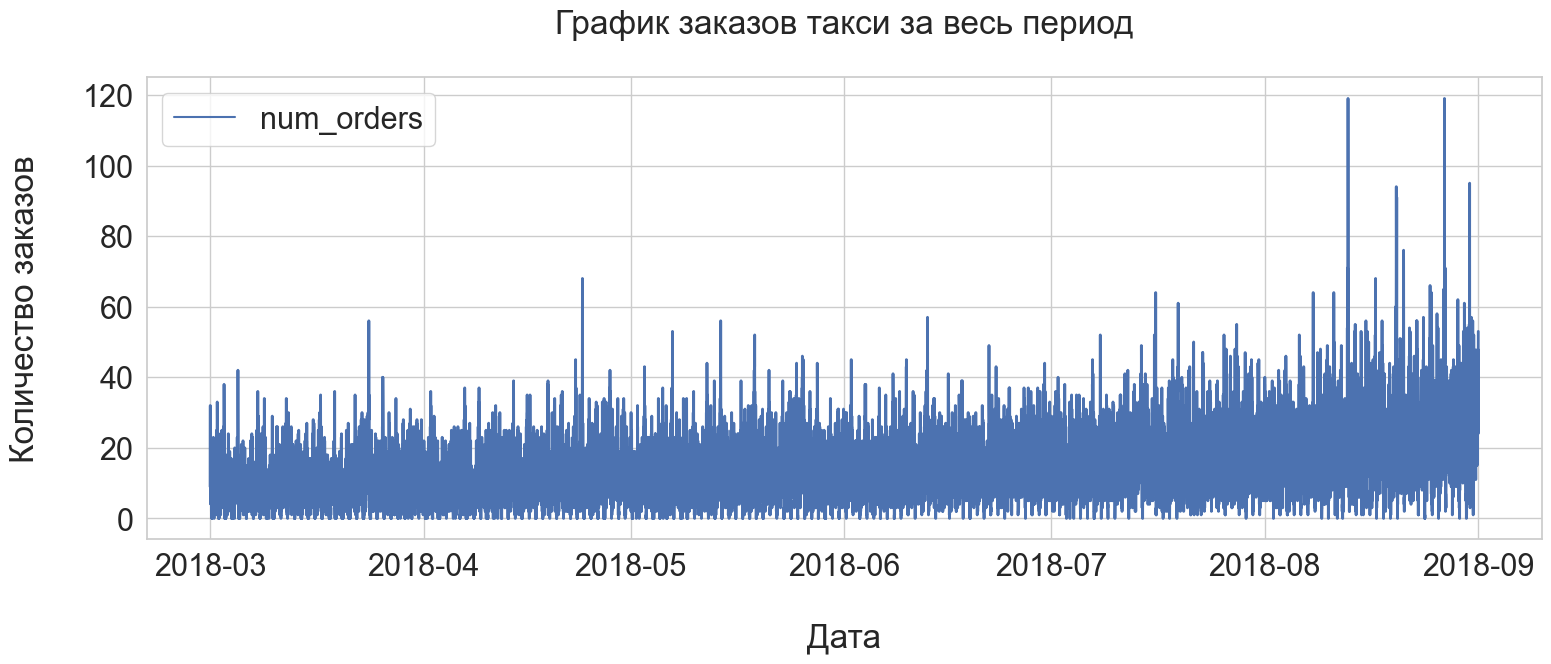

In [7]:
def lineplot_timeseries(df, title='', xlabel='\nДата', ylabel='Количество заказов\n'):
    '''функция выводит  линейный график зависимости целевой переменной от временного интервала'''
    
    fig, ax = plt.subplots()  
    
    ax = sns.lineplot(data=df, linewidth=2, dashes=False)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.minorticks_on()
    
    fig.set_figheight(6)
    fig.set_figwidth(18)

lineplot_timeseries(taxi, title='График заказов такси за весь период\n')

In [8]:
print(f'Временной интервал наших данных {taxi.index.min()} - {taxi.index.max()}')
print('Ряд монотонно возрастает') if taxi.index.is_monotonic_increasing else print('Ряд не монотонный') 

Временной интервал наших данных 2018-03-01 00:00:00 - 2018-08-31 23:50:00
Ряд монотонно возрастает


Таким образом, в нашем распоряжении исторические данные о заказах такси в аэропортах с 1 марта по 31 августа 2018 года с разбивкой по 10 минут. Они представляют собой временной ряд с индексом в формате дата/время. Ряд является монотонно-возрастающим.

Датафрейм содержит 26496 запись и 1 колонку с количеством заказов такси `num_orders`, которая и является целевой для наших предсказаний - нашей целью является построение такой модели, которая будет предсказывать количество заказов такси на следующий час, то есть поставлена задача регрессии временного ряда.

Тип колонки `num_orders` численный `int64`, пропусков данные не содержат, минимальное количество заказов 0, максимальное 199, в среднем совершается 13-14 заказов за 10 минут.

Так как нам нужно спрогнозировать количество заказов такси на следующий час, то требуется сделать ресемплирование наших данных по одному часу. Выведем все статистики для трансформированных данных.

In [9]:
taxi_resampled = taxi.resample('1H').sum().sort_index()

In [10]:
all_info(taxi_resampled)

num_orders
datetime                       
2018-06-22 19:00:00          82
2018-08-28 07:00:00          71
2018-05-30 07:00:00           8
2018-08-03 22:00:00         170
2018-03-31 10:00:00          48
2018-04-20 13:00:00          67
2018-08-03 18:00:00          91
2018-07-04 23:00:00         110
2018-03-21 01:00:00          85
2018-07-08 00:00:00          99

Датафрейм содержит 4416 записей и 1 колонки


column  dtype  non_null_count  num_missing  percent_missing
0  num_orders  int64            4416            0              0.0

count       mean        std  min   25%   50%    75%    max
num_orders  4416.0  84.422781  45.023853  0.0  54.0  78.0  107.0  462.0

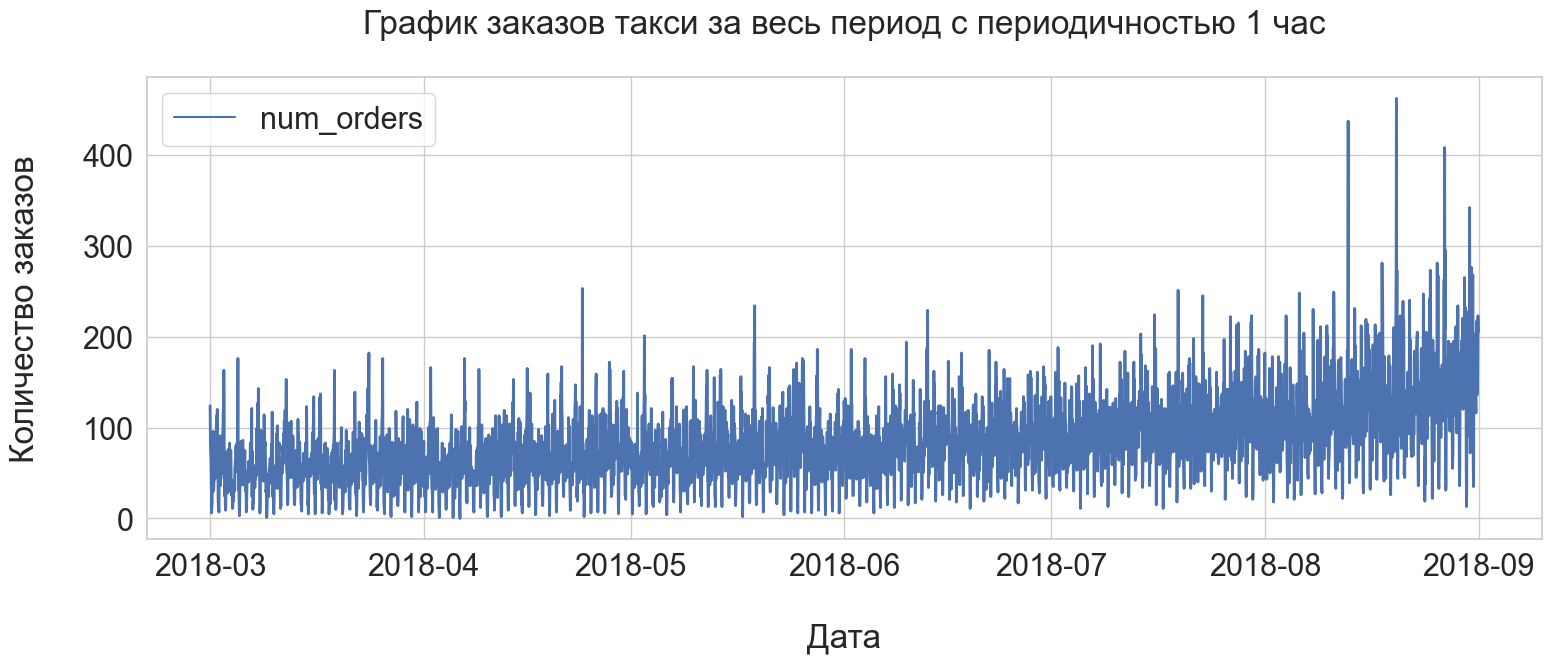

In [11]:
lineplot_timeseries(taxi_resampled, title='График заказов такси за весь период с периодичностью 1 час\n')

Таким образом, нам удалось сгладить временной ряд и сделать его менее шумным, просто взяв в качестве индекса час вызова такси и агрегировав суммарное количество заказов по часам. 

Рассмотрим небольшой кусочек данных, например, с 1 марта по 1 апреля.

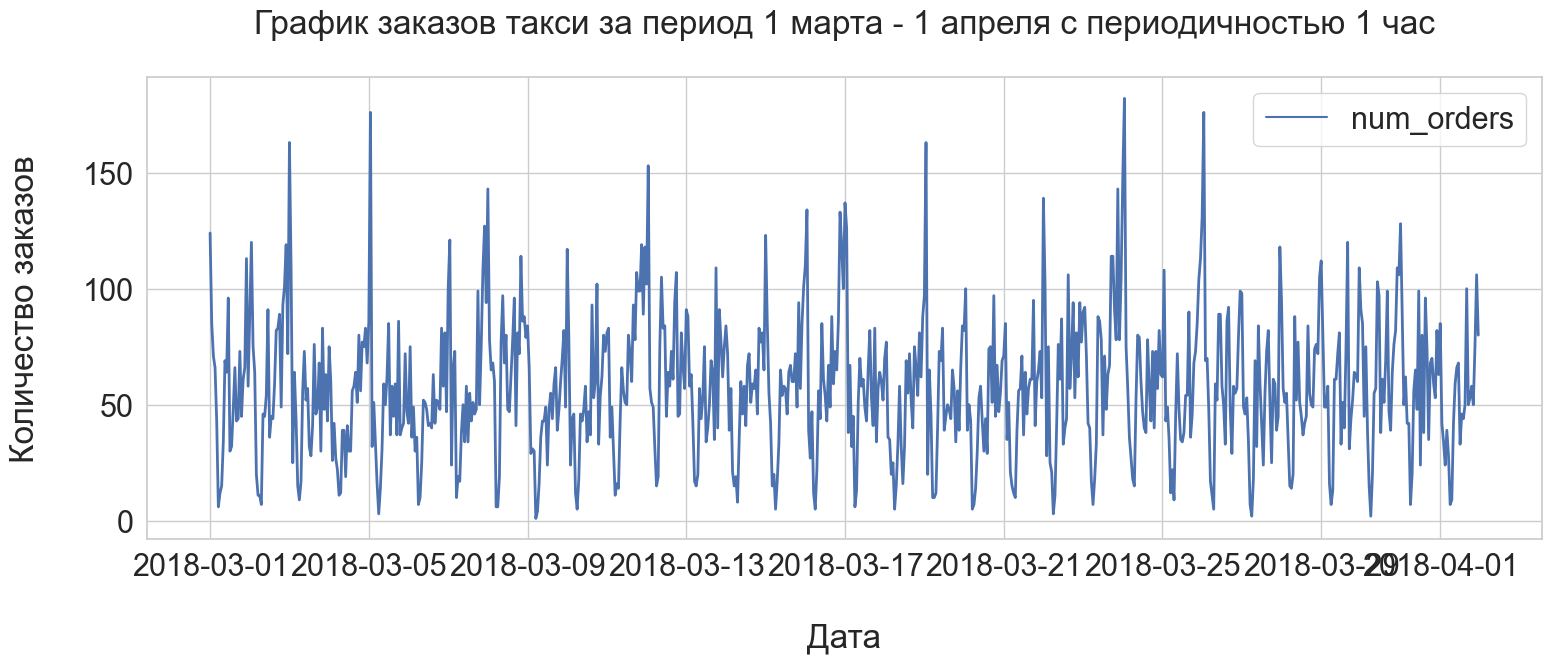

In [12]:
lineplot_timeseries(taxi_resampled['2018-03-01':'2018-04-01'], title='График заказов такси за период 1 марта - 1 апреля с периодичностью 1 час\n')

Итак, данные были ресеплированы с периодичностью в 1 час по сумме заказов в час.

После ресемплирования в нашем наборе данных осталось 4416 строк, минимальное количество заказов так и осталось 0, максимальное теперь 462 (сумма 6 значений в час), в среднем совершается 78-84 заказа за час, стандартное отклонение этого показателя выросло с 9 до 45 (наблюдается достаточно значительная вариабельность).

Дальнейшая обработка будет включать в себя: 
    
- проверку распределение целевого признака,  
- проверку ряда на стационарность, 
- декомпозицию временного ряда на основные оставляющие,
- изучение компонент сезонности,
- генерацию новых признаков из параметров даты и времени.

## Анализ

### Распределение целевого признака num_orders.

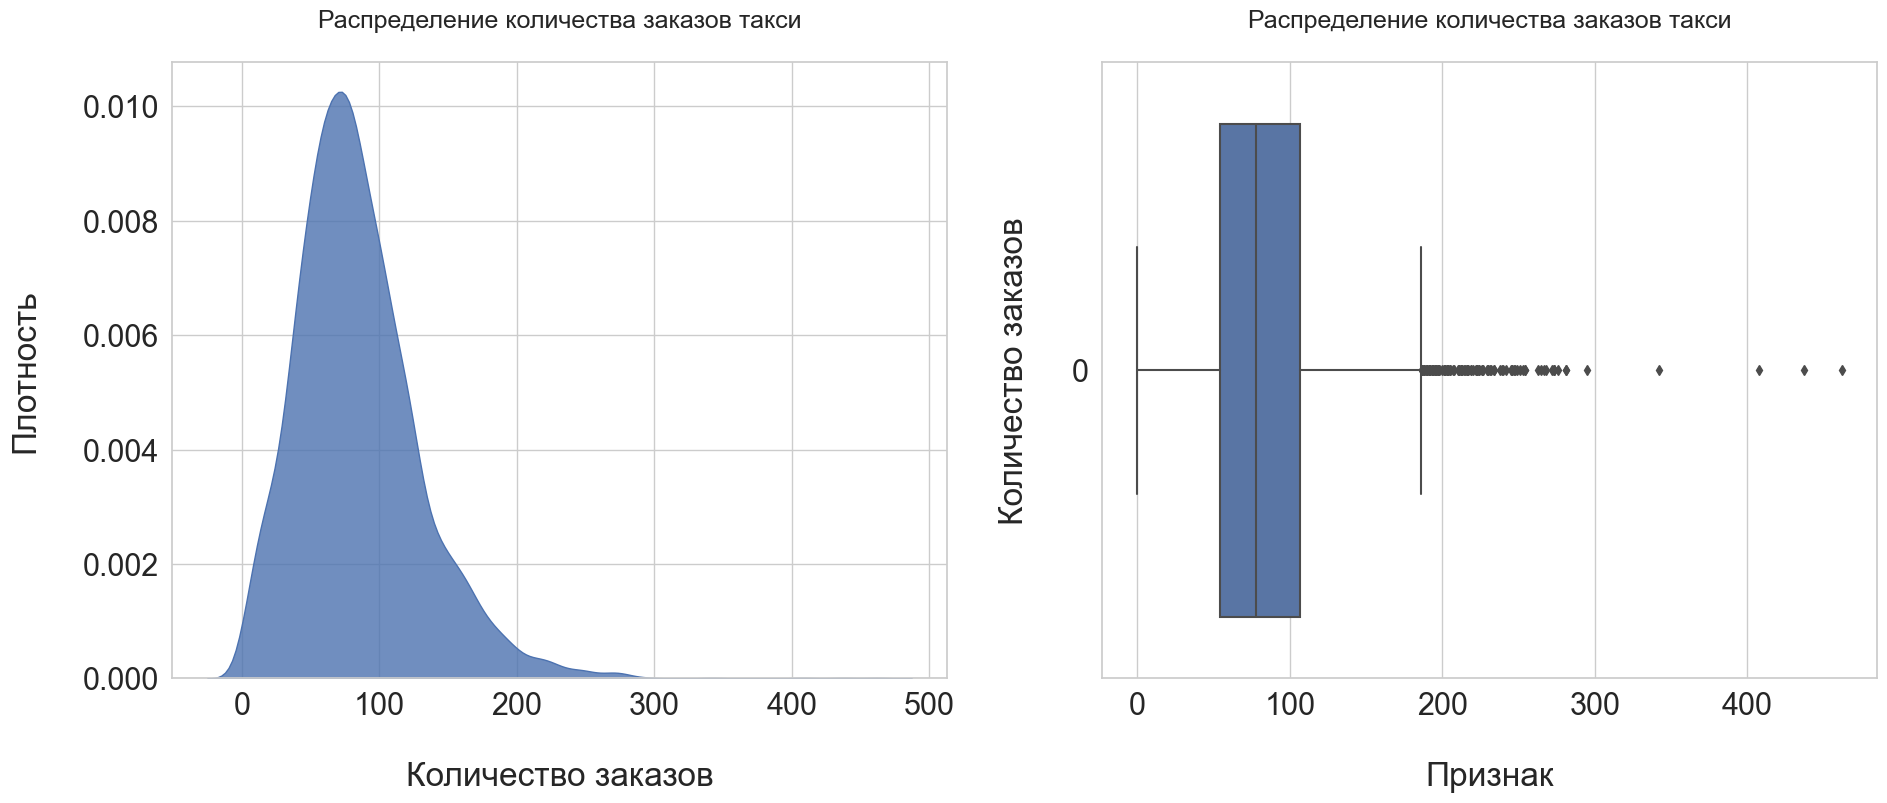

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(22, 8))
sns.set(font_scale=1.5)
    
gr1 = sns.kdeplot(taxi_resampled['num_orders'], alpha=.8, shade=True, ax=axs[0]) 
gr2 = sns.boxplot(taxi_resampled['num_orders'], ax=axs[1], orient='h')
    
gr1.set(title='Распределение количества заказов такси\n', xlabel='\nКоличество заказов', ylabel='Плотность\n')
gr2.set(title='Распределение количества заказов такси\n', xlabel='\nПризнак', ylabel='Количество заказов\n');

Распределение количества заказов близко к нормальному с пиком в районе 78 заказов в час. Целевой признак главным образом распределен между значениями 0-200 заказов в час, большее количество заказов является относительно редки явлением.

### Проверка ряда на стационарность.

**ВАЖНЫЙ ДИСКЛЕЙМЕР** Далее идет код вот из этой отличной статьи https://habr.com/ru/post/207160/

Так как, многие методы и модели анализа временных рядов основаны на предположениях о стационарности ряда, то для проверки проверки ряда на стационарность проведем обобщенный тест Дикки-Фуллера на наличие единичных корней. Для этого в модуле statsmodels есть функция adfuller().

Под стационарностью понимают свойство процесса не менять своих статистических характеристик с течением времени, а именно постоянство матожидания, постоянство дисперсии (она же гомоскедастичность) и независимость ковариационной функции от времени (должна зависеть только от расстояния между наблюдениями).

По сути, чтобы проверить гипотезу о том, что наш ряд является стационарным, вводится:

- Нулевая гипотеза Н0 - есть единичные корни, ряд не стационарен, заказы распределяются случайным образом.
- Альтернативная гипотеза Н1 - ряд не имеет единичных корней, а следовательно, стационарен.

Уровень статистической значимости принимается равным 5%.

In [14]:
test_DF = adfuller(taxi_resampled)

print('adf: ', test_DF[0])
print('p-value: ', test_DF[1])
print('Critical values: ', test_DF[4])

if test_DF[0] > test_DF[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

adf:  -3.0689242890279544
p-value:  0.028940051402612965
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
Единичных корней нет, ряд стационарен.


Проведенный тест подтвердил предположения о стационарности ряда, то есть мы можем заниматься задачей его прогнозирования без специальных преобразований.

Попробуем проинтегрировать наш ряд и посмотреть, как он будет выглядеть.

In [15]:
taxi_diff = taxi_resampled.diff(periods=1).dropna()

В коде выше функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода (период смещения передается как параметр `period`). Так как в разности первое значение получится неопределенным, то нам надо избавиться от него - для этого используется метод dropna().

In [16]:
m = taxi_diff.index[round(len(taxi_diff.index)/2+1)]
r1 = sm.stats.DescrStatsW(taxi_diff[m:])
r2 = sm.stats.DescrStatsW(taxi_diff[:m])

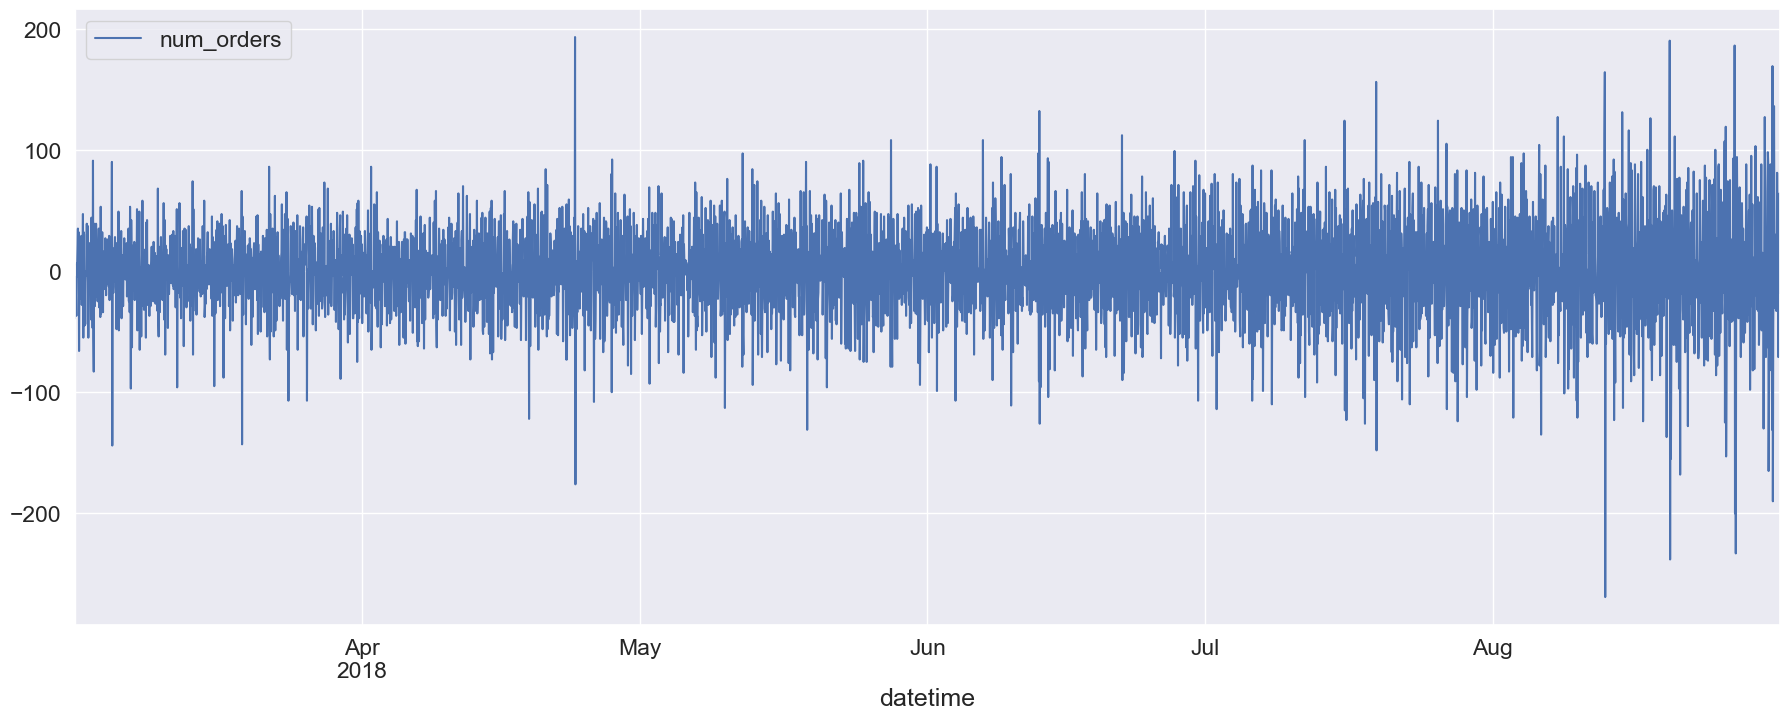

In [17]:
taxi_diff.plot();

Тренд отсутствует, что лишний раз доказывает гипотезу о том, что наш ряд является стационарным, то есть его будущие статистические характеристики не будут отличаться от наблюдаемых текущих.

Введем статистики скользящего среднеквадратичного отклонения и скользящего среднего, с размером окна 24 (24 часа в сутках), а далее построим график и рассмотрим, как они меняются на протяжении всего рассматриваемого периода.

In [18]:
taxi_resampled['rolling_mean'] = taxi_resampled['num_orders'].rolling(24).mean()
taxi_resampled['rolling_std'] = taxi_resampled['num_orders'].rolling(24).std()
taxi_resampled.tail()

num_orders  rolling_mean  rolling_std
datetime                                                  
2018-08-31 19:00:00         136    167.541667    63.268908
2018-08-31 20:00:00         154    168.041667    63.105487
2018-08-31 21:00:00         159    166.416667    62.801908
2018-08-31 22:00:00         223    169.125000    63.816525
2018-08-31 23:00:00         205    167.416667    62.197383

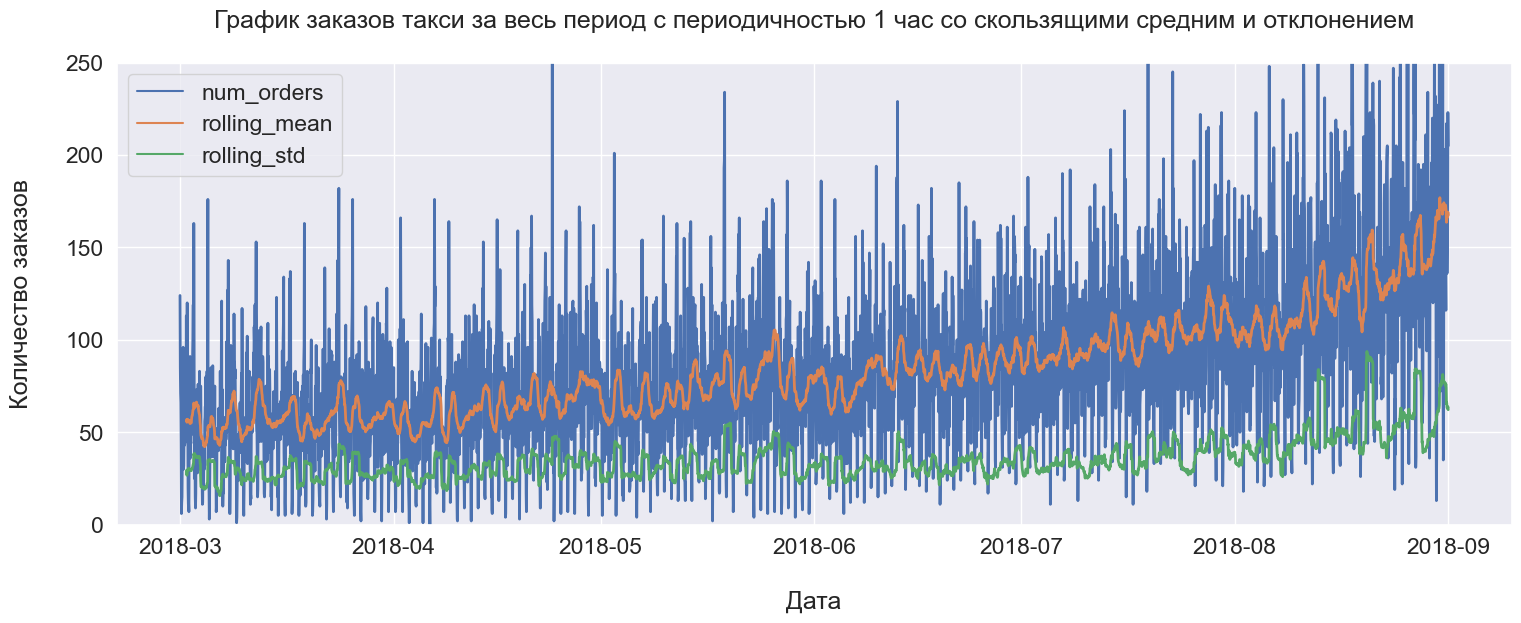

In [19]:
lineplot_timeseries(taxi_resampled, title='График заказов такси за весь период с периодичностью 1 час со скользящими средним и отклонением\n')
plt.ylim(0, 250);

Судя по графику, среднее и стандартное отклонение менялись со временем, обе статистики постепенно растут, наиболее активный рост начинается с июня и продолжается вплоть до конца августа (видимо, это связано с сезоном отпусков, а следовательно, повышенным использованием воздушного сообщения).

In [20]:
taxi_resampled = taxi_resampled.drop(['rolling_mean', 'rolling_std'], axis=1)

### Декомпозиция временного ряда на основные оставляющие.

Для более детального рассмотрения, выполним декомпозицию - разложим ряд на тренд, сезонность и шум (необъяснимые остатки), и выведем графики для каждого атрибута.

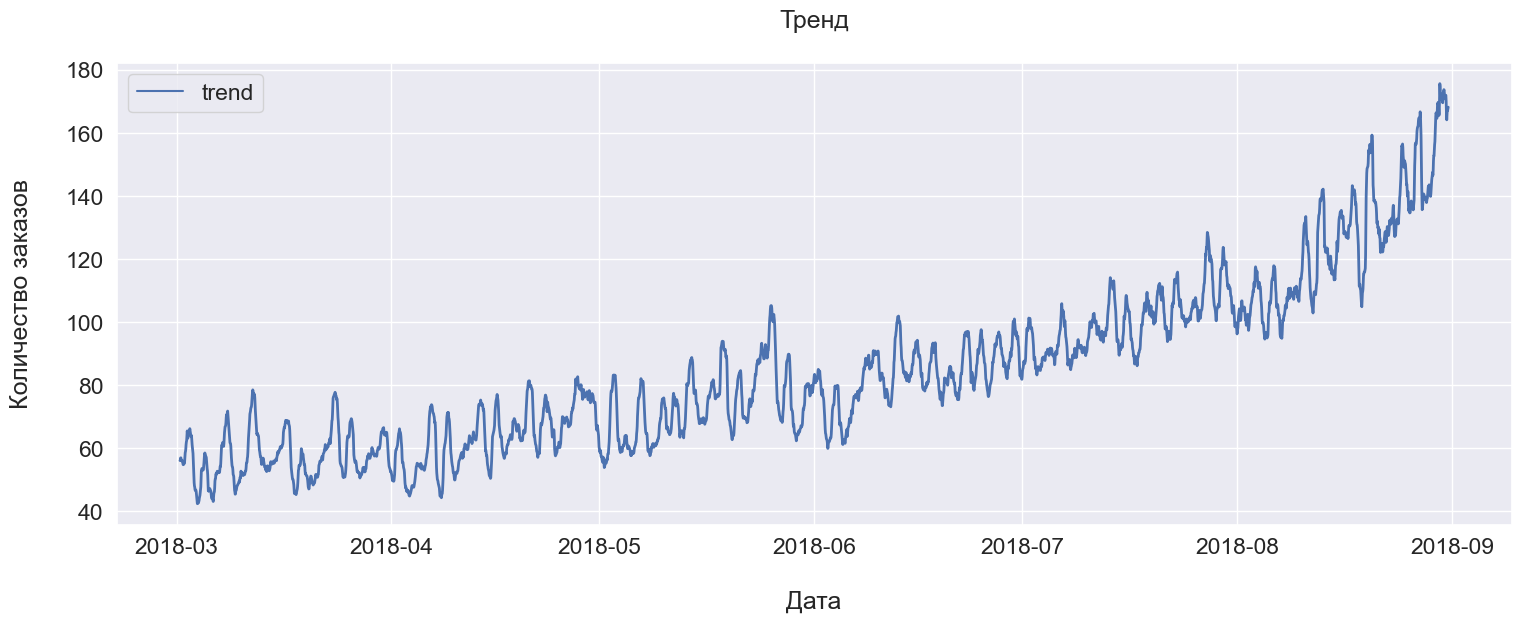

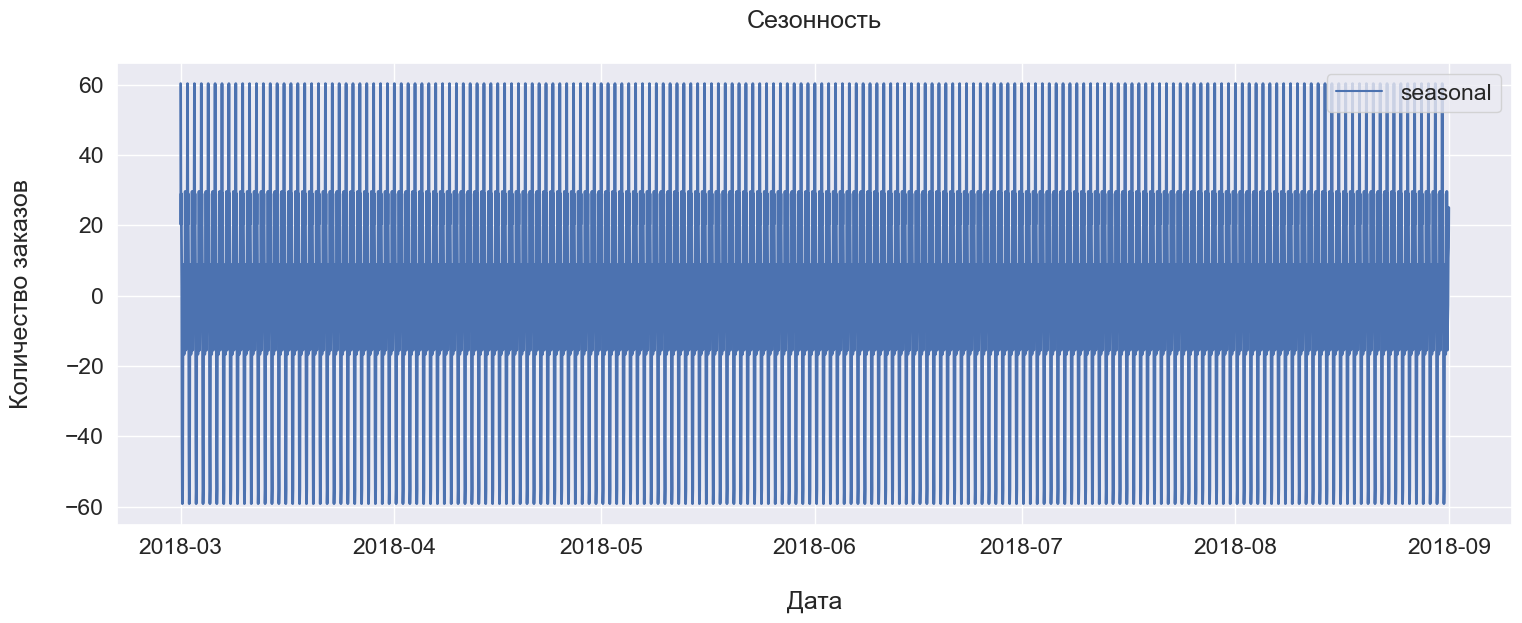

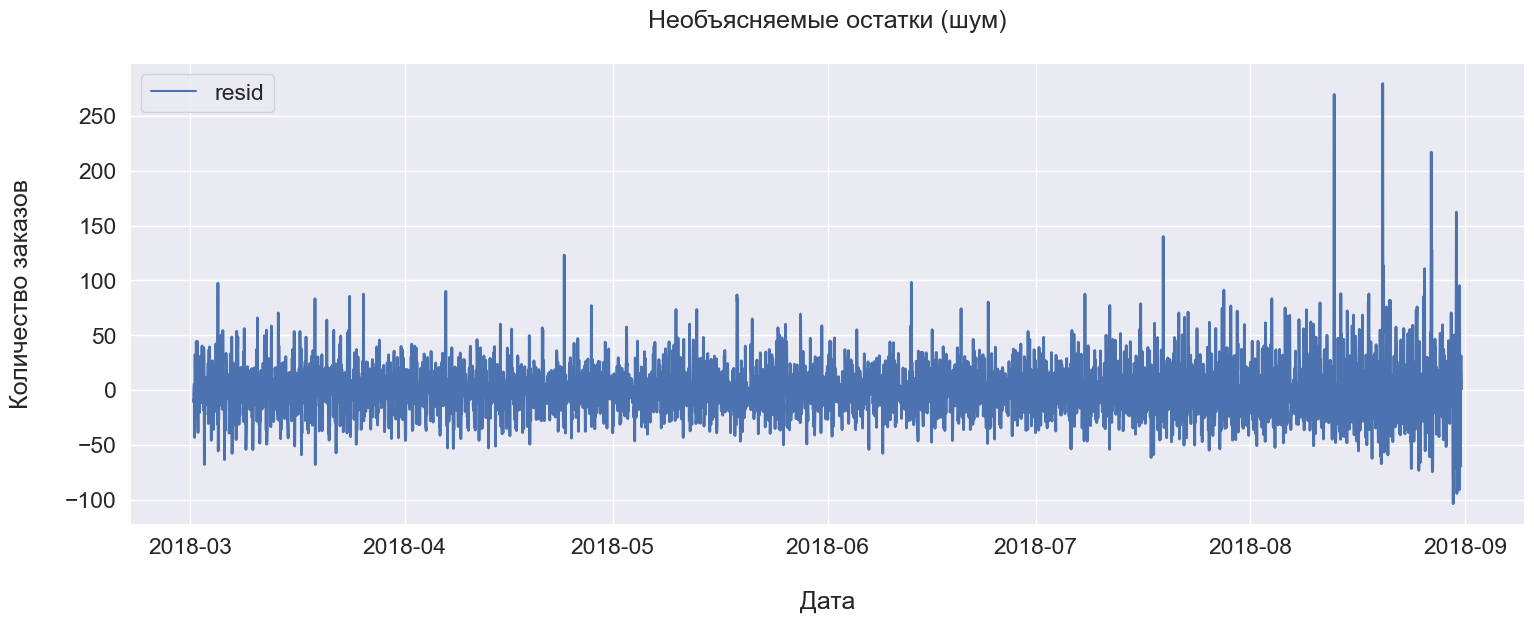

In [21]:
decomposed = seasonal_decompose(taxi_resampled[['num_orders']])
lineplot_timeseries([decomposed.trend], title='Тренд\n')
lineplot_timeseries([decomposed.seasonal], title='Сезонность\n')
lineplot_timeseries([decomposed.resid], title='Необъясняемые остатки (шум)\n')

График тренда показывает восходящую тенденцию, то есть с течением времени количество заказов увеличивается. К сожалени, мы не имеем данных за полный год, чтобы проследить изменения месяц к месяцу разных лет и сравнить показатели в таком разрезе.

График сезонности вышел очень зашумленным, поэтому для детального рассмотрения предлагаю вывести его кусочками по месяцам.

### Изучение компонент сезонности.

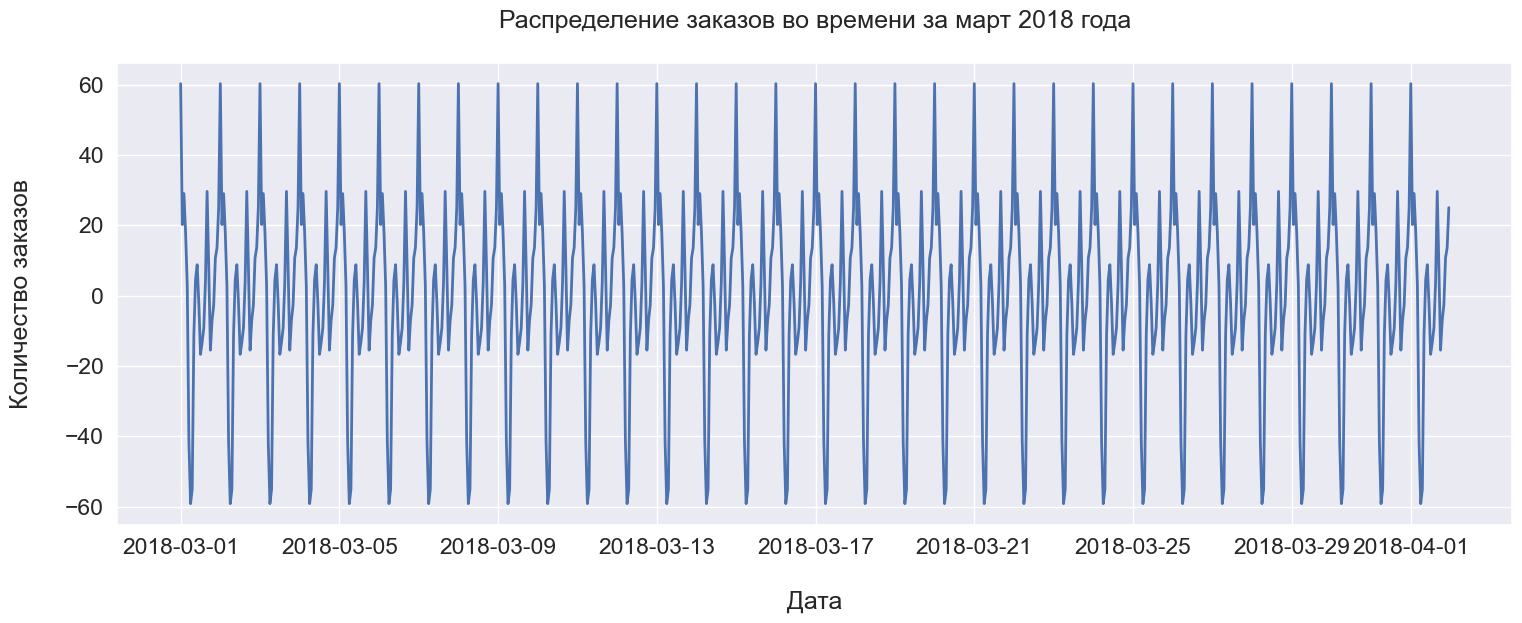

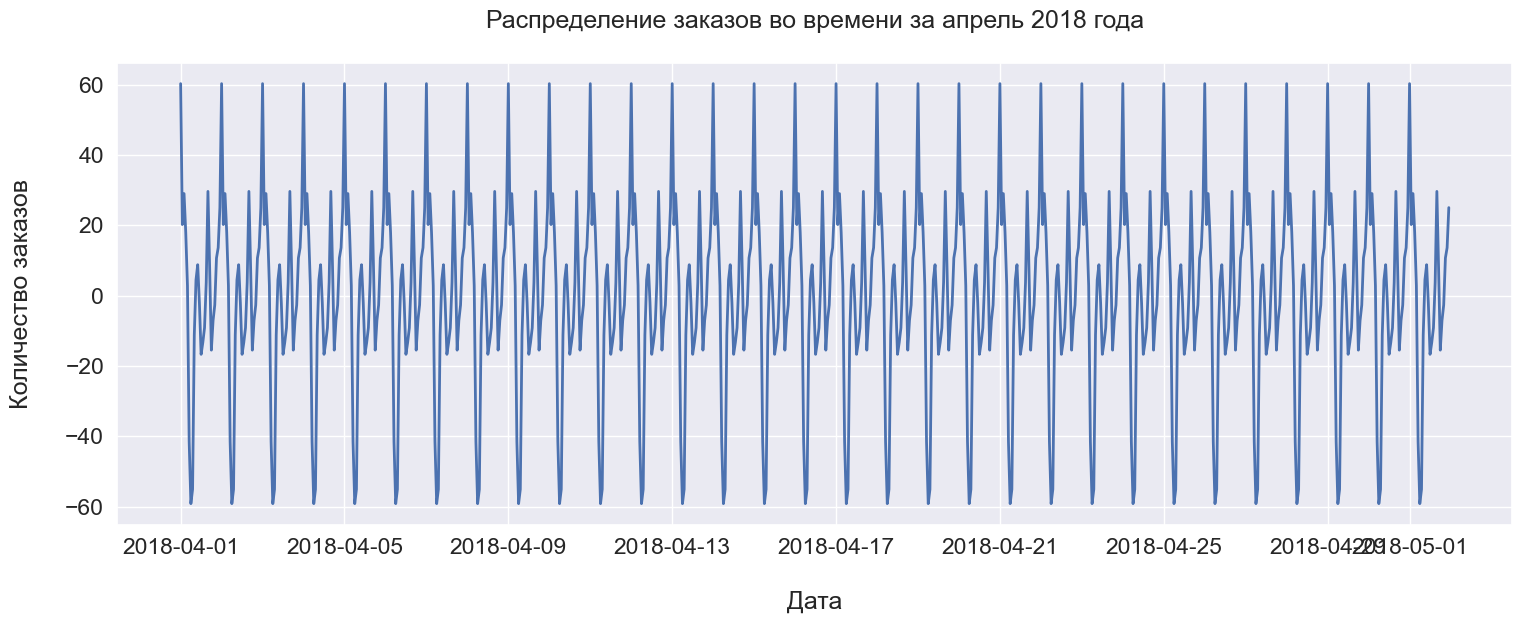

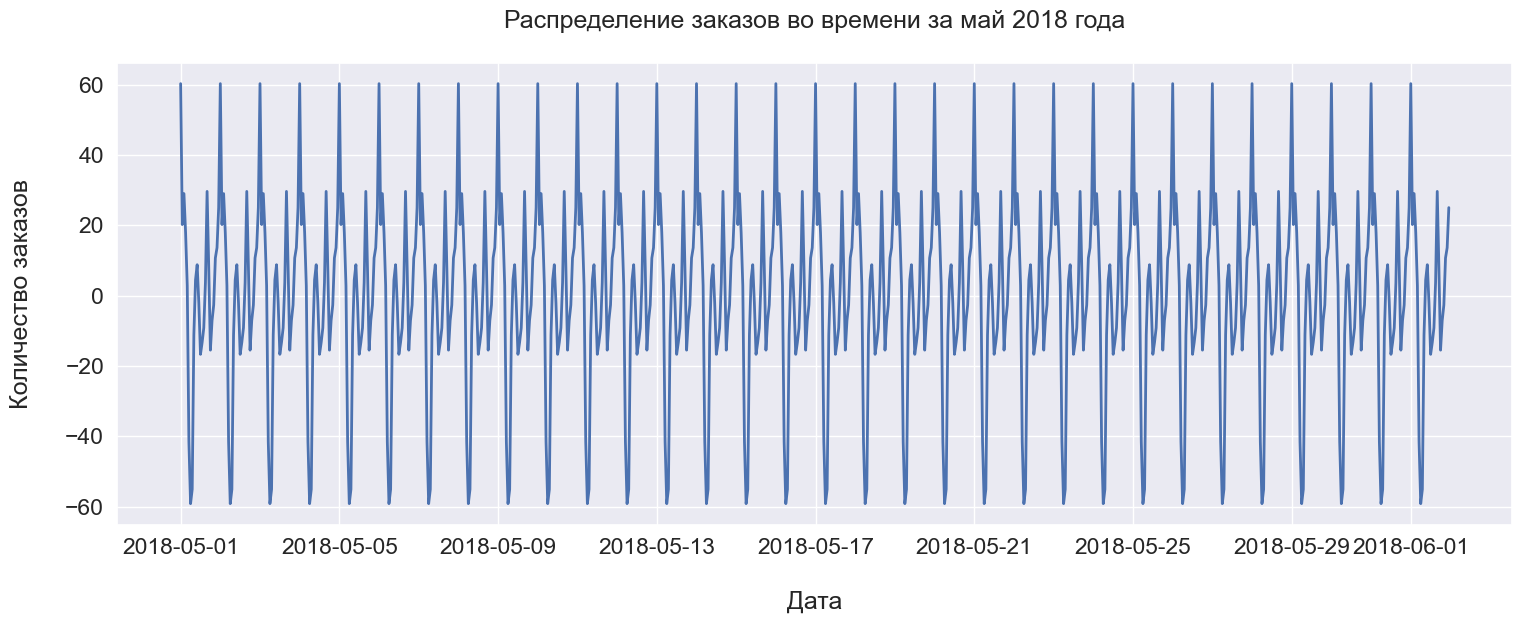

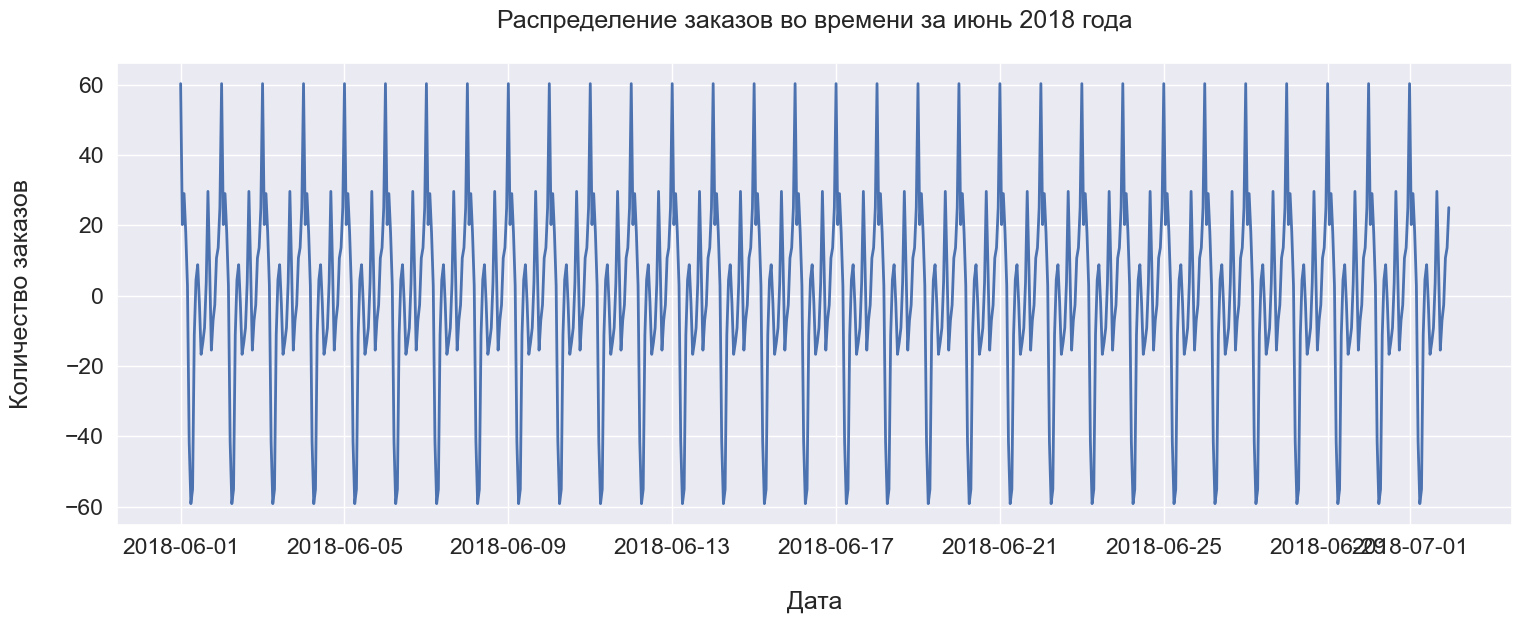

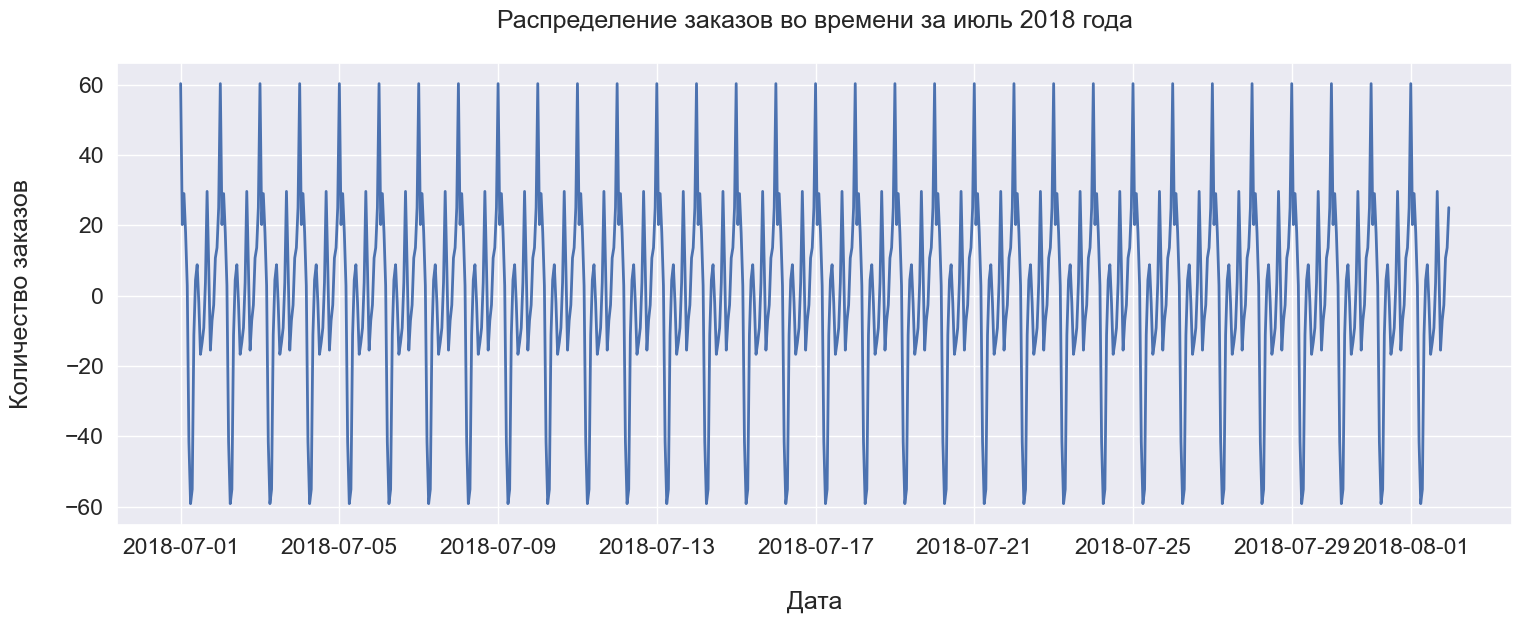

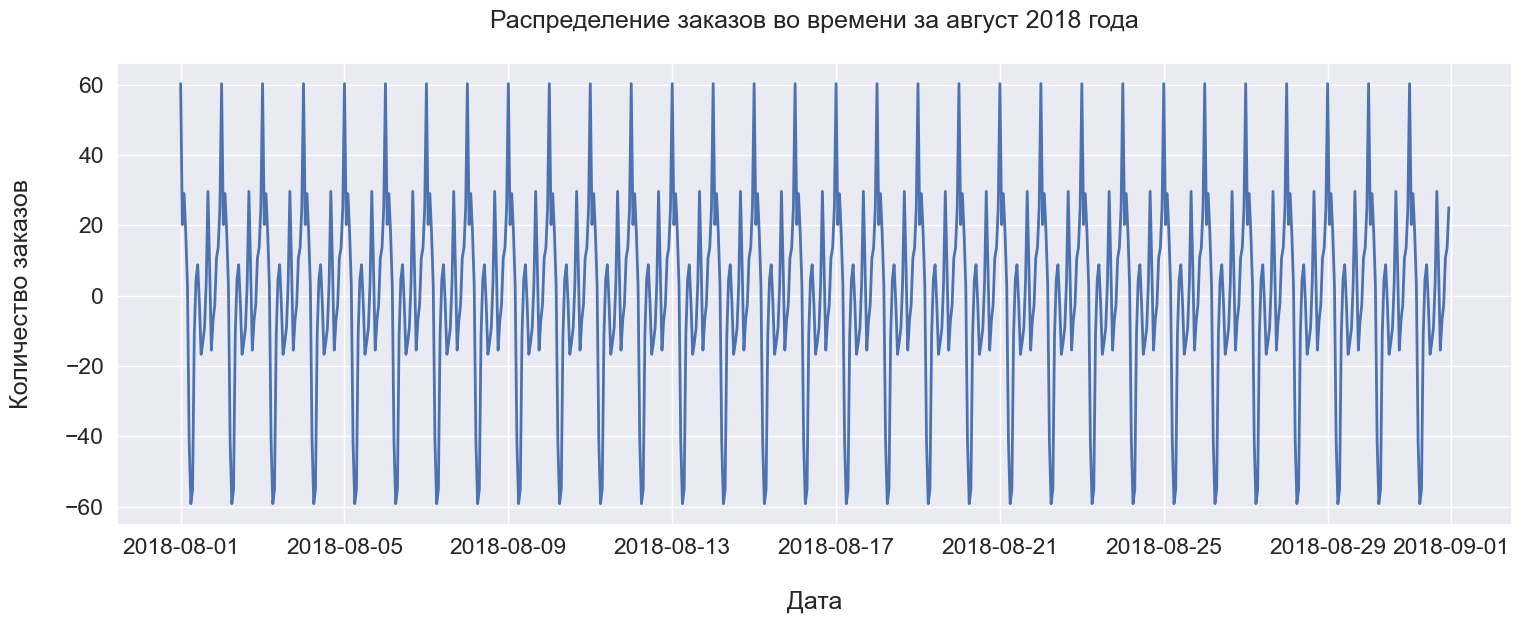

In [22]:
months_list = ['март', 'апрель', 'май', 'июнь', 'июль', 'август']

for i in range(3, 9):
    lineplot_timeseries(decomposed.seasonal['2018-0' + str(i) + '-01' : '2018-0' + str(i + 1) + '-01'], 
            title=f'Распределение заказов во времени за {months_list[i-3]} 2018 года\n');

В таком приближении очень хорошо заметна сезонность заказов по суткам. Приблизим еще.

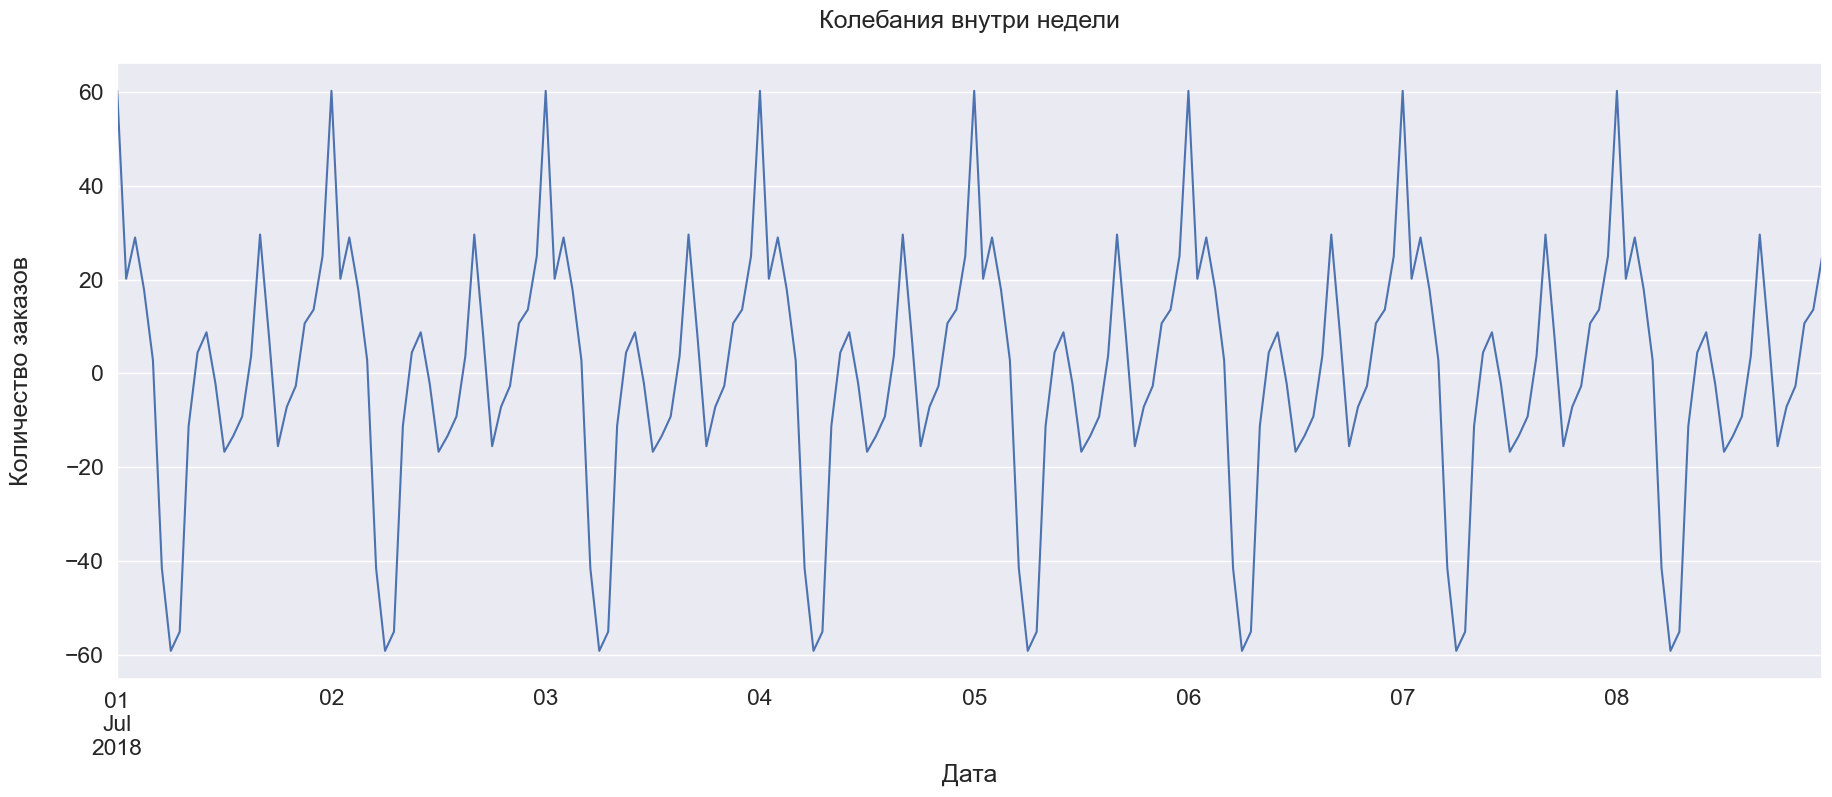

In [23]:
fig = decomposed.seasonal['2018-07-01':'2018-07-08'].plot(ax=plt.gca())
fig.set(xlabel='Дата', ylabel='Количество заказов\n', title='Колебания внутри недели\n');

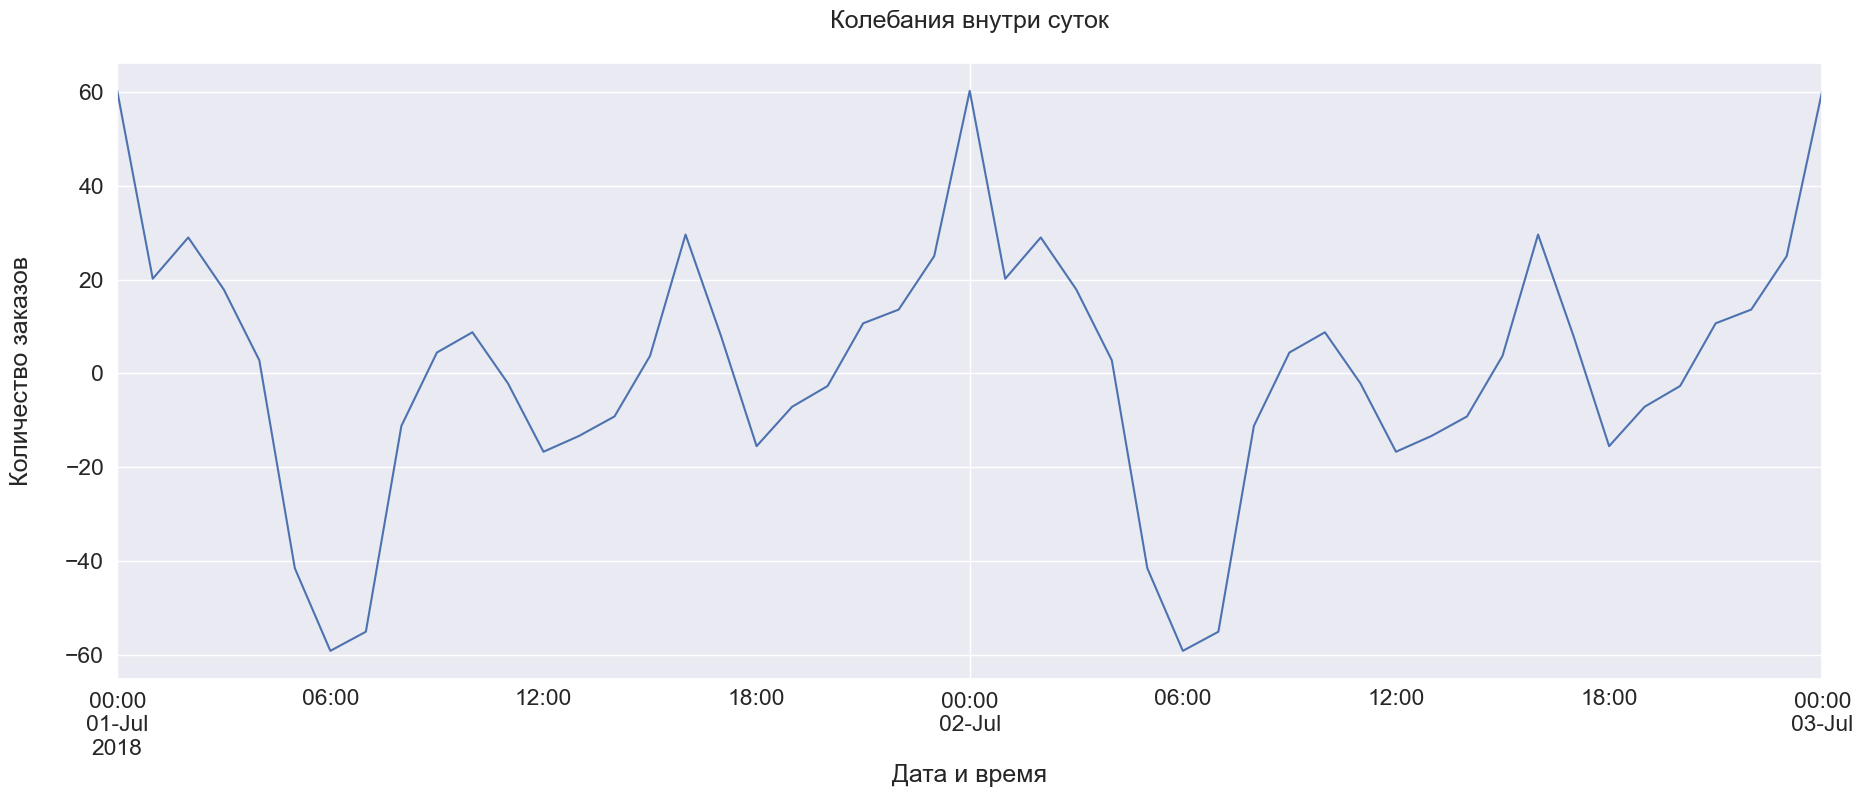

In [24]:
fig = decomposed.seasonal['2018-07-01 00:00':'2018-07-03 00:00'].plot(ax=plt.gca())
fig.set(xlabel='Дата и время', ylabel='Количество заказов\n', title='Колебания внутри суток\n');

Наблюдается сезонность колебаний количества заказываемых такси:

- как внутри суток (максимальный пик в полночь, далее к 6 часам утра количество заказов падает в минимум, затем снова растет, достигая максимума примерно в 10 часов утра, затем падает и снова возвращается к пику в 17 часов, после чего в 18 часов снова наблюдает резкое падение с постепенным ростом до 12 часов ночи);
- так и внутри недели (внутрисуточная сезонность повторяется каждый день в течение недели).

Подробнее рассмотреть эти закономерности, сгрупировав заказы пользователей по дням недели и часам, мы сможем после введения новых признаков, извлеченных из даты.

### Генерация новых признаков из параметров даты и времени.

Создадим новые признаки на основе информации о дате:

- `hour` (порядковый номер часа, в который был сделан заказ, от 0 до 23),
- `day` (порядковый номер дня, в который был сделан заказ, от 1 до 31),
- `dayofweek` (порядковый номер дня недели, в который был сделан заказ, от 0 до 6),
- `lag_i` (где под i имеется ввиду величина смещения временного ряда),
- `rolling_mean` скользящее среднее с шириной окна rolling_mean.

In [25]:
def make_features(data, max_lag, rolling_mean):

    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
       
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
  
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean).mean()

**Дисклеймер:** далее информация взята отсюда

https://machinelearningmastery.ru/gentle-introduction-autocorrelation-partial-autocorrelation/

Мы можем вычислить корреляцию для наблюдений временного ряда с наблюдениями предыдущих временных интервалов, называемыми лагами. Поскольку корреляция наблюдений временного ряда рассчитывается со значениями того же ряда в предыдущие моменты времени, это называется последовательной корреляцией или автокорреляцией.

График автокорреляции временного ряда по лагу называется AutoСorrelationFunction (ACF) или автокорреляционным графиком.

Частичная автокорреляция - это сводка взаимосвязи между наблюдением во временном ряду с наблюдениями на предыдущих временных этапах с удалением взаимосвязей между промежуточными наблюдениями.

Частичная автокорреляция при лаге k - это корреляция, возникающая после устранения влияния любых корреляций, связанных с членами с более короткими лагами.

Автокорреляция для наблюдения и наблюдения на предыдущем временном шаге состоит из прямой и косвенной корреляций. Эти косвенные корреляции являются линейной функцией корреляции наблюдения с наблюдениями на промежуточных временных шагах.

Чтобы понять, сколько лагов потребуется для дальнейшего обучения моделей, построим графики автокорреляции и частичной корреляции до 50го значения.

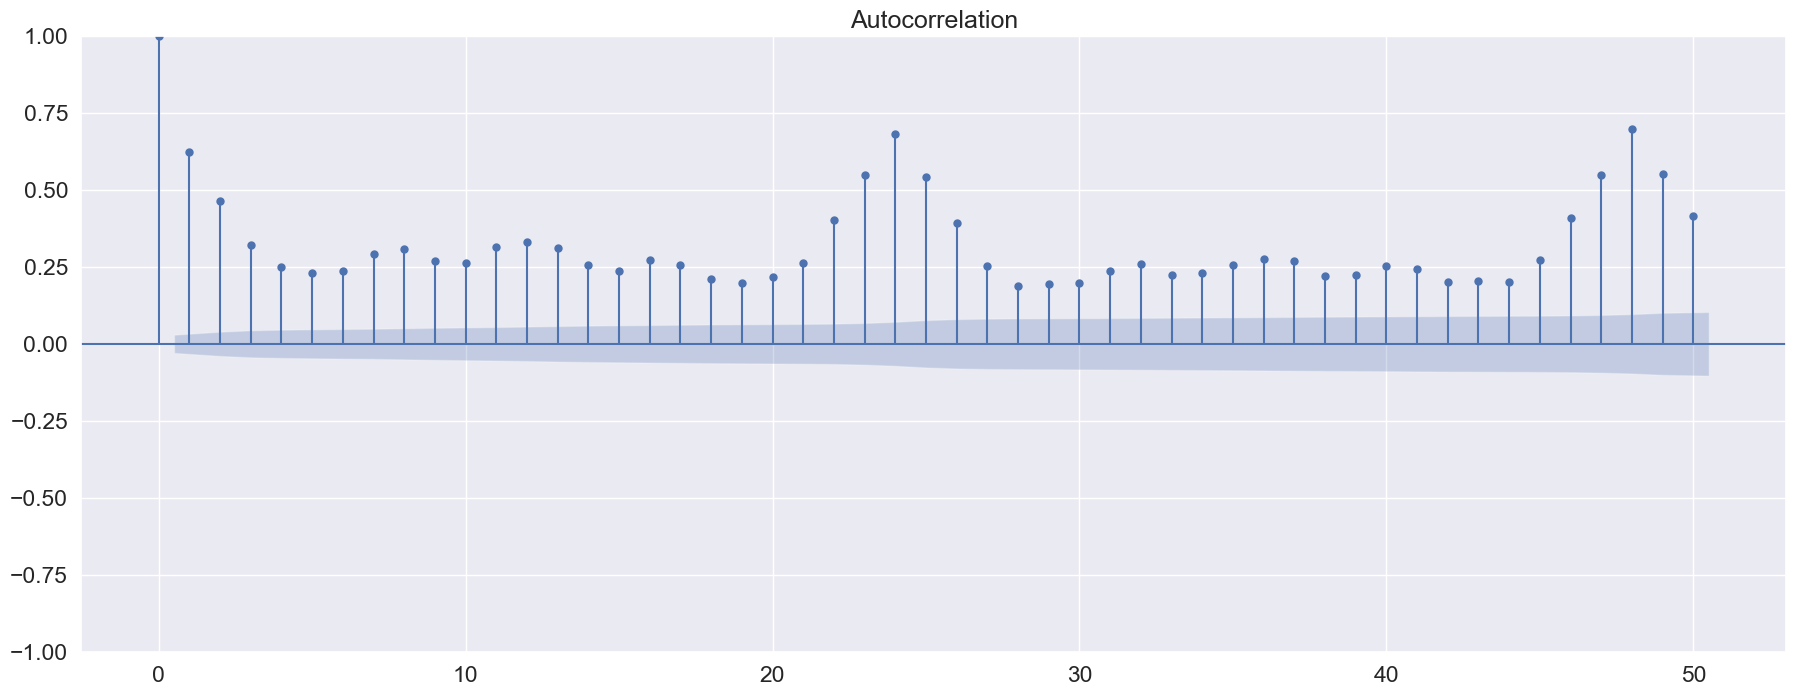

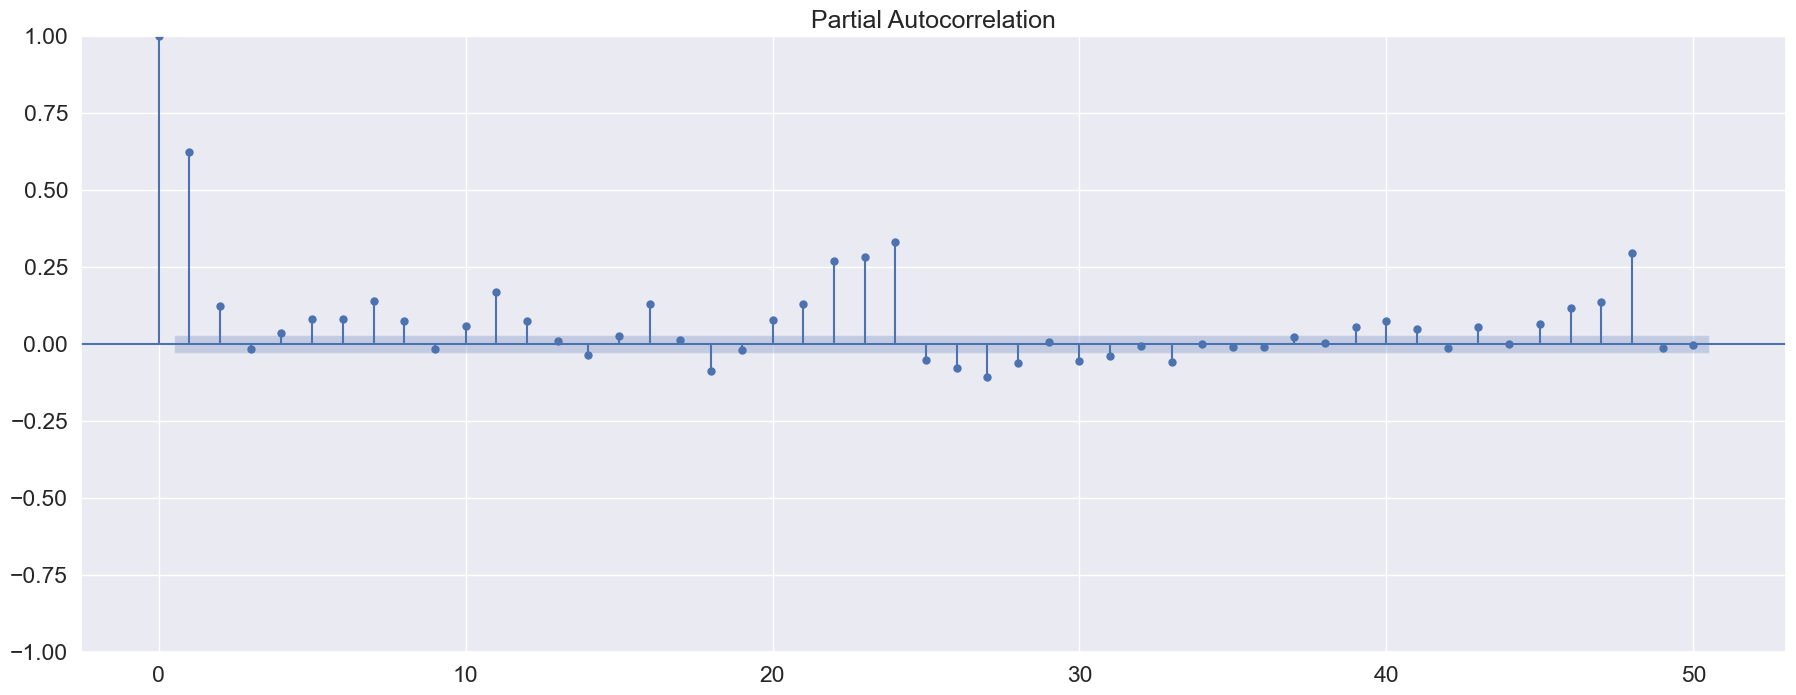

In [26]:
# по оси X отображается количество задержек, а по оси Y — автокорреляция при этом количестве задержек
# по умолчанию график начинается с запаздывания = 0, а автокорреляция всегда будет равна 1 при запаздывании = 0

# график автокорреляции для первых 50 лагов
plot_acf(taxi_resampled['num_orders'].values.squeeze(), lags=50)

# график частичной автокорреляционной функции для первых 50 лагов
plot_pacf(taxi_resampled['num_orders'].values.squeeze(), lags=50);

На графиках прослеживается сильная сезонность, это видно по высоким пикам на значении 1 (что понятно, значение заказов за предыдущий час важно для предсказания последующего часа), 22, 23 и 24 (то есть есть повторяющийся паттерн в течение суток).

Таким образом, можно ввести в качестве новых признаков лаги с 1 по 24й, а также скользящее среднее с усреднением, например, по 6 значениям (6*4=24).

In [27]:
make_features(taxi_resampled, 24, 6)
taxi_resampled.tail()

num_orders  hour  day  dayofweek  lag_1  lag_2  lag_3  \
datetime                                                                     
2018-08-31 19:00:00         136    19   31          4  207.0  217.0  197.0   
2018-08-31 20:00:00         154    20   31          4  136.0  207.0  217.0   
2018-08-31 21:00:00         159    21   31          4  154.0  136.0  207.0   
2018-08-31 22:00:00         223    22   31          4  159.0  154.0  136.0   
2018-08-31 23:00:00         205    23   31          4  223.0  159.0  154.0   

                     lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  lag_10  lag_11  \
datetime                                                                        
2018-08-31 19:00:00  116.0  133.0  166.0  136.0  167.0  191.0   203.0   182.0   
2018-08-31 20:00:00  197.0  116.0  133.0  166.0  136.0  167.0   191.0   203.0   
2018-08-31 21:00:00  217.0  197.0  116.0  133.0  166.0  136.0   167.0   191.0   
2018-08-31 22:00:00  207.0  217.0  197.0  116.0  133.0  166.0   136.0   167.0   
2018-08-31 23:00:00  136.0  207.0  217.0  197.0  116.0  133.0   166.0   136.0   

                     lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  lag_18  \
datetime                                                                      
2018-08-31 19:00:00    46.0    35.0    78.0   268.0    99.0   230.0   194.0   
2018-08-31 20:00:00   182.0    46.0    35.0    78.0   268.0    99.0   230.0   
2018-08-31 21:00:00   203.0   182.0    46.0    35.0    78.0   268.0    99.0   
2018-08-31 22:00:00   191.0   203.0   182.0    46.0    35.0    78.0   268.0   
2018-08-31 23:00:00   167.0   191.0   203.0   182.0    46.0    35.0    78.0   

                     lag_19  lag_20  lag_21  lag_22  lag_23  lag_24  \
datetime                                                              
2018-08-31 19:00:00   276.0   246.0   158.0   198.0   142.0    72.0   
2018-08-31 20:00:00   194.0   276.0   246.0   158.0   198.0   142.0   
2018-08-31 21:00:00   230.0   194.0   276.0   246.0   158.0   198.0   
2018-08-31 22:00:00    99.0   230.0   194.0   276.0   246.0   158.0   
2018-08-31 23:00:00   268.0    99.0   230.0   194.0   276.0   246.0   

                     rolling_mean  
datetime                           
2018-08-31 19:00:00    172.666667  
2018-08-31 20:00:00    167.666667  
2018-08-31 21:00:00    171.166667  
2018-08-31 22:00:00    178.333333  
2018-08-31 23:00:00    182.666667

Теперь, когда у нас есть новые признаки, можно отобразить на барплотах среднее количество заказов такси по времени суток и дням недели через группировку.

In [28]:
def barplot_grouped(df, period, title='', xlabel=''):    
    '''функция визуализирует барплотом среднее количество заказов по задаваемому периоду'''
    
    df_new = df[['num_orders', period]].groupby(by=period).agg('median').reset_index()
    bar = sns.barplot(data=df_new, x=df_new[period], y=df_new['num_orders'])
    
    bar.set_title(title, fontdict={'fontsize': 14})
    
    bar.set_xlabel(xlabel, fontsize=14)
    bar.set_ylabel('Количество заказов\n', fontsize=14)

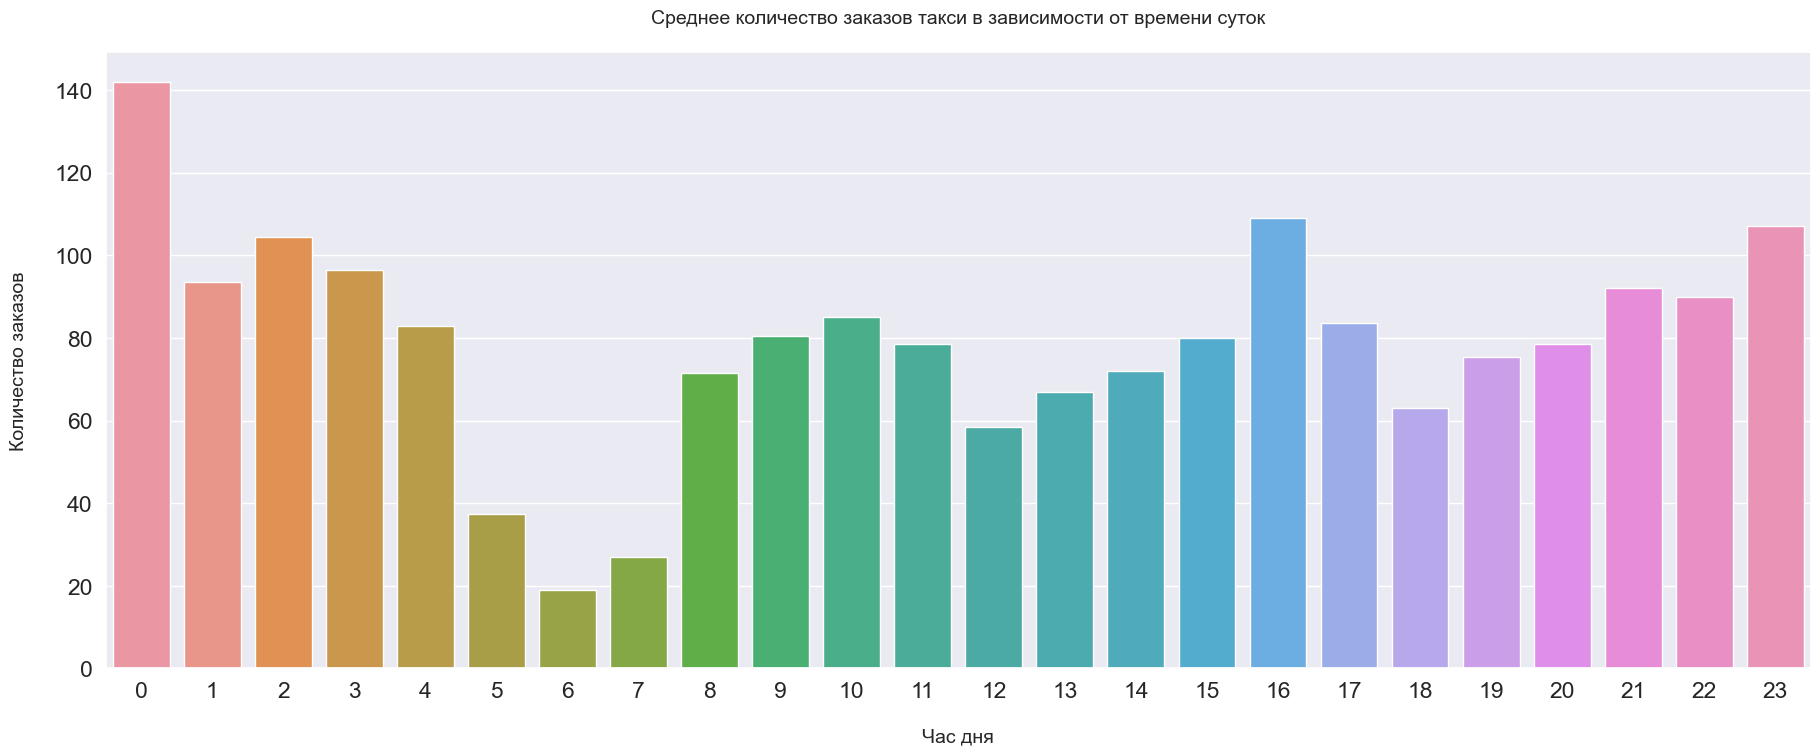

In [29]:
barplot_grouped(taxi_resampled, 'hour', title='Среднее количество заказов такси в зависимости от времени суток\n', xlabel='\nЧас дня')

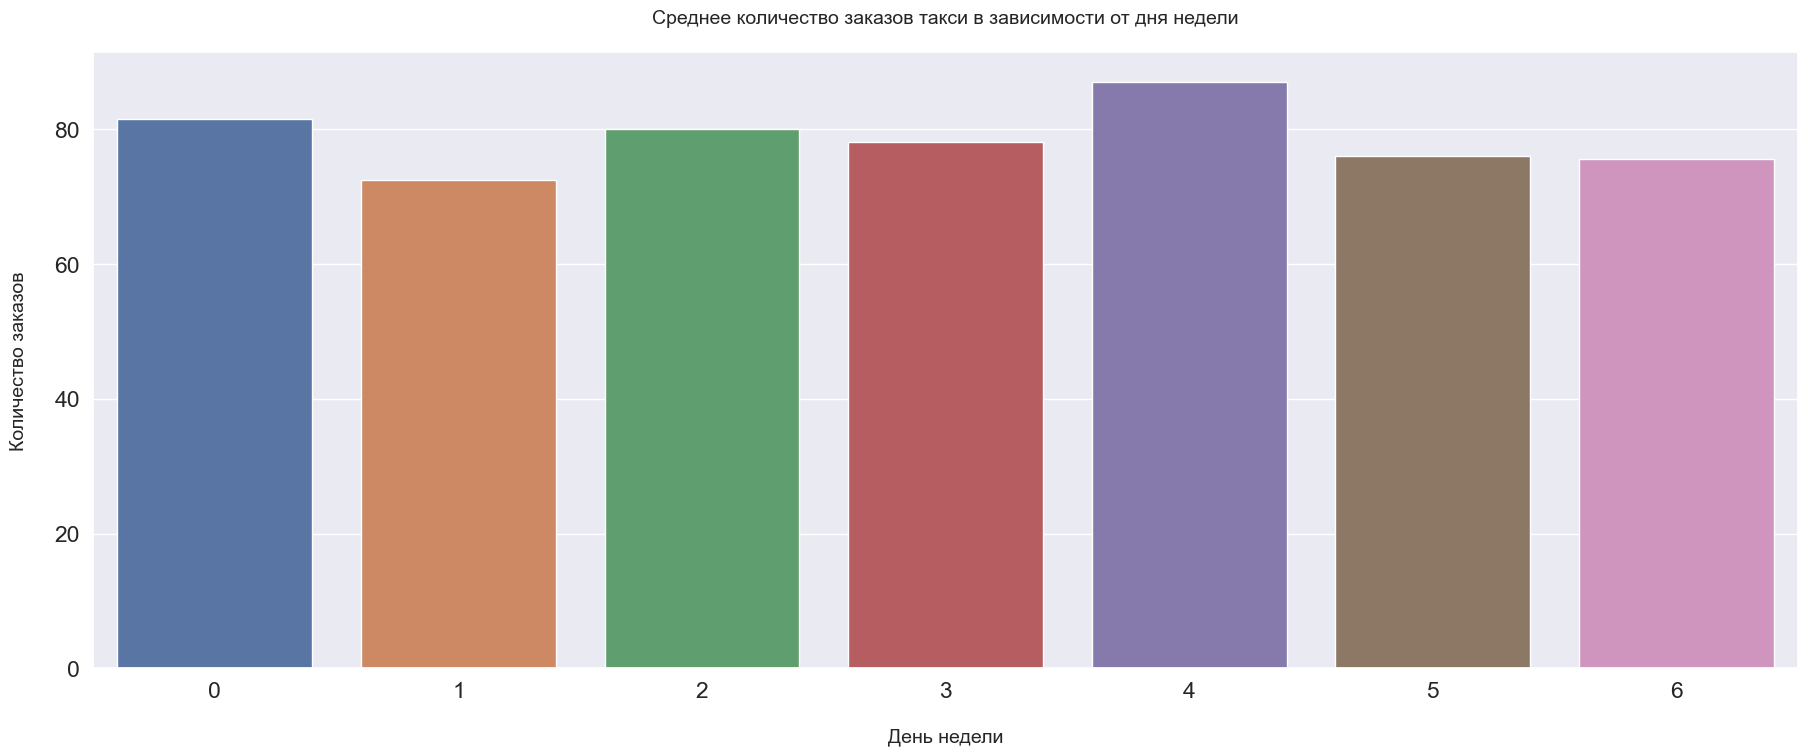

In [30]:
barplot_grouped(taxi_resampled, 'dayofweek', title='Среднее количество заказов такси в зависимости от дня недели\n', xlabel='\nДень недели')

Как ранее было отмечено, максимальное количество заказов достигается в полночь - в среднем около 140 заказов. Далее к часу ночи оно резко падает на треть, тенденция на спад продолжается и достигает пика с минимальным количеством заказов в сутки в районе 6-7 часов утра. Пики высокого спроса в течение дня перемежаются спадами, повышенный спрос заметен в 10, 16 часов (около 110 заказов), и далее вечером в 21 час.

Самое высокое количество заказов среди недели в пятницу (около 90 в сутки), чуть ниже спрос по понедельникам и средам (около 80 заказов), самый низкий спрос во вторник - порядка 70 заказов такси.

Также посмотрим на корреляцию новых признаков.

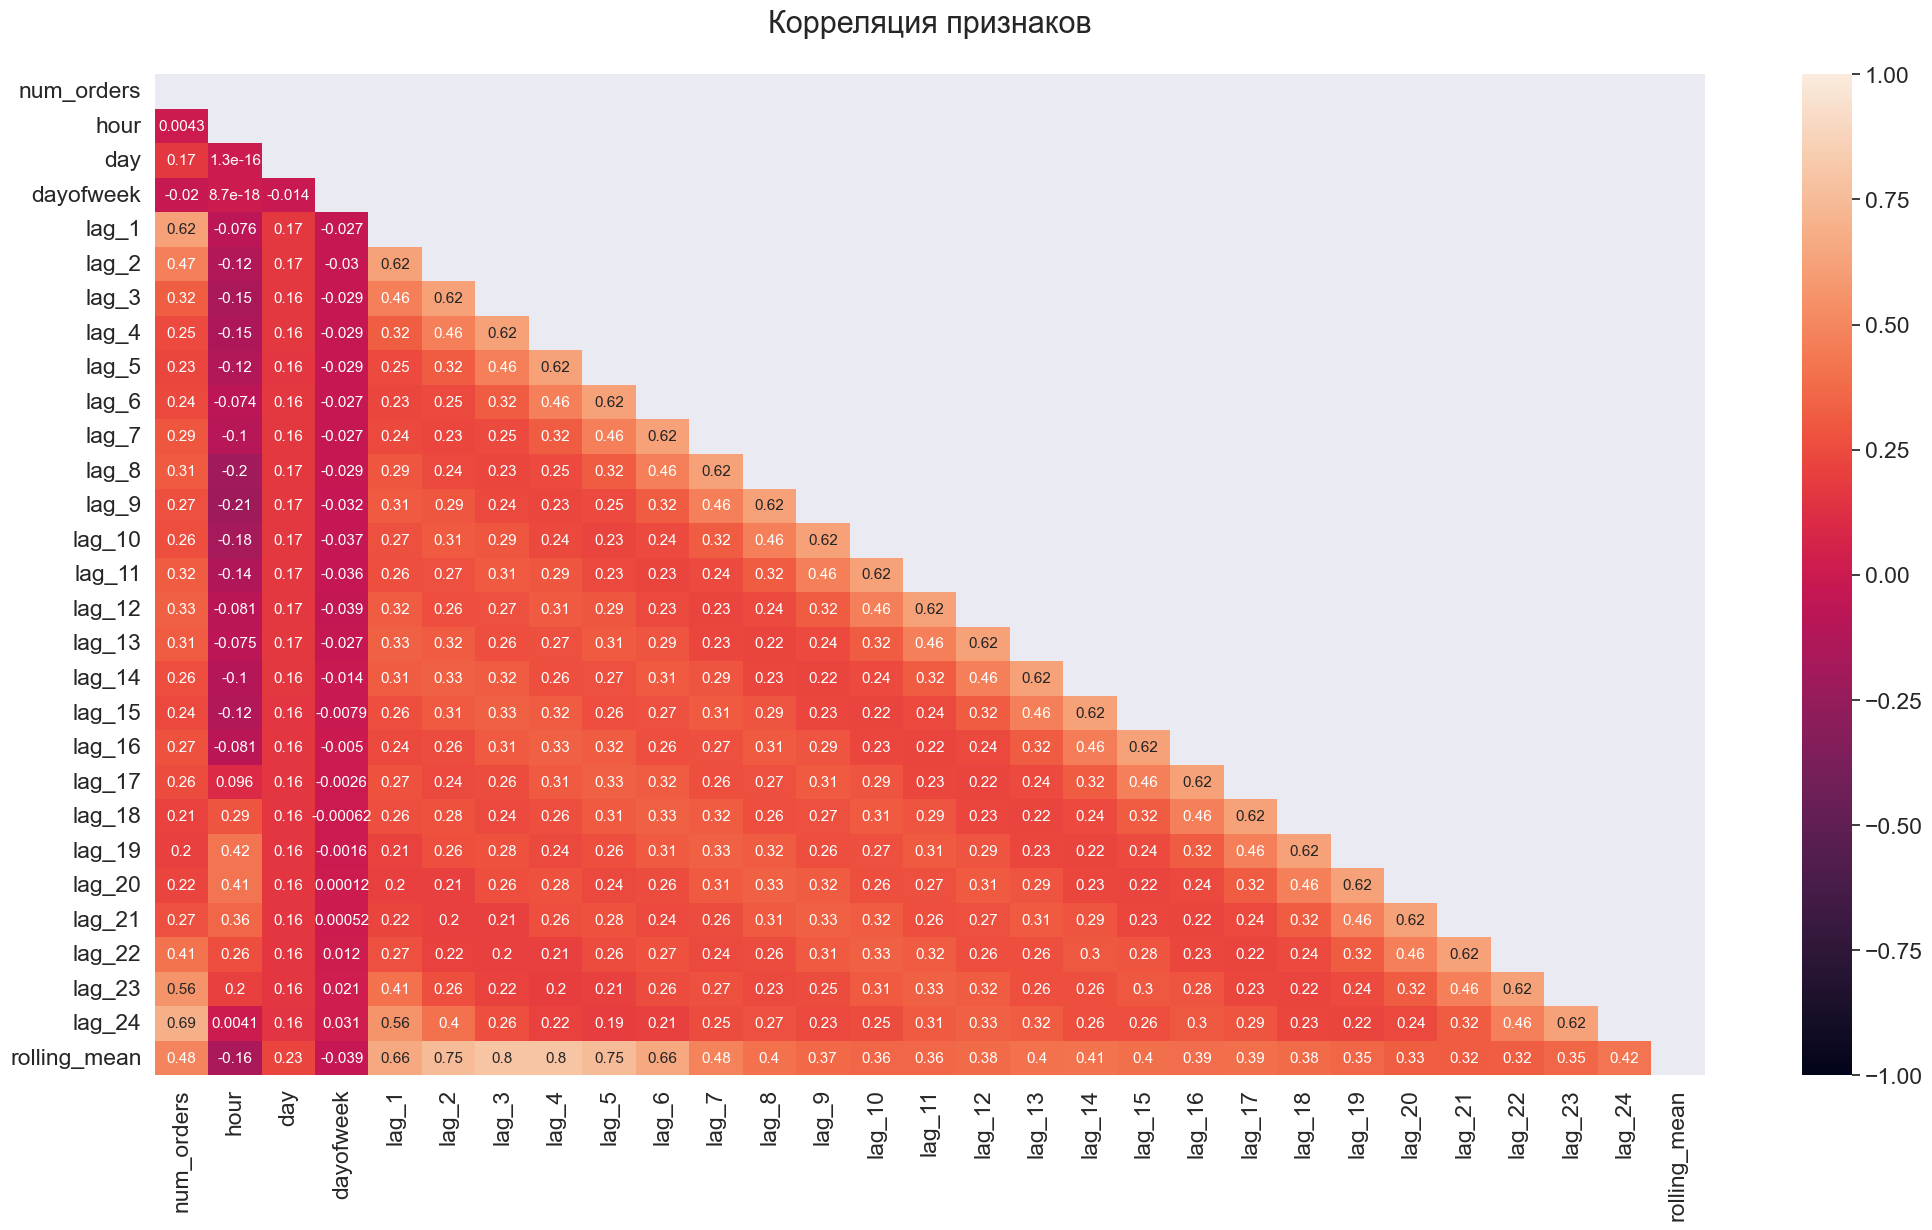

In [31]:
matrix = np.triu(taxi_resampled.corr())

plt.figure(figsize=(25, 13))
fig = sns.heatmap((taxi_resampled.corr()), vmin=-1, vmax=1, annot=True, fmt='.2g', mask=matrix, annot_kws={'fontsize':11});
plt.title('Корреляция признаков\n', fontdict={'fontsize':22});

- Общее количество заказов наиболее сильно связано со значениями 1, 2, 23 и 24 лагов и скользящего среднего.
- Сильных взаимосвязей между показателями часа-дня-дня недели и лагов не обнаружено.
- Корреляция между лаг и лаг+1 одинакова для всех значений и равна 0.62, между лаг и лаг+2 - 0.46 (то есть чем больше временной разрыв, тем менее важно значение для последующих предсказаний).
- Среди всех лагов выделяется связь между 1м и 24м значениями на уровне 0.56.

**Выводы по разделу**

Нами был проведен цикл предобработки временного ряда до приведения данных к виду, пригодному для подачи в модели машинного обучения.

- Изучен датасет с историческими данными о заказах такси в аэропортах, его основные характеристики, проведена проверка на пропуски.
- Временной ряд ресемплирован по 1 часу.
- Визуализировано распределение целевого признака (количество заказов), распределение количества заказов по часам и дням недели.
- Для соблюдения всех теоретических предпосылок с помощью обобщенного теста Дикки-Фуллера подтверждена гипотеза о стационарности временного ряда.
- Проведена декомпозиция временного ряда на основные оставляющие и изучены компоненты сезонности.
- Визуализированы графики автокорреляции и частичной автокорреляции.
- На основе полученной информации сгенерированы новые признаки из параметров даты и времени: `hour` (порядковый номер часа, в который был сделан заказ, от 0 до 23), `day` (порядковый номер дня, в который был сделан заказ, от 1 до 31), `dayofweek` (порядковый номер дня недели, в который был сделан заказ, от 0 до 6), `лаги` со смещениями от 1 до 24, `rolling_mean` скользящее среднее.
- Визуализирована корреляция между признаками и целевой переменной.

## Обучение

Подготовим данные для подачи в модели, отделив 10% тестовой выборки, на ней мы будем проверять только одну финльную лучшую модель.

In [32]:
train, test = train_test_split(taxi_resampled, shuffle=False, test_size=0.1, random_state=RANDOM)
train = train.dropna()

Проверим, что наши обучающая и тестовая выборки не пересекаются, для этого сравним максимум по времени для train и минимум по времени для test.

In [33]:
print(f'Минимум обучающей выборки: {train.index.min()}, максимум обучающей выборки: {train.index.max()}')

print(f'Минимум тестовой выборки: {test.index.min()}, максимум тестовой выборки: {test.index.max()}')

Минимум обучающей выборки: 2018-03-02 00:00:00, максимум обучающей выборки: 2018-08-13 13:00:00
Минимум тестовой выборки: 2018-08-13 14:00:00, максимум тестовой выборки: 2018-08-31 23:00:00


Выборки разделены правильно. Теперь выделим отдельно для каждой фичи и целевую переменную и проверим размер этих выборок.

In [34]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [35]:
print(f'Размер признаков обучающей выборки {features_train.shape}, размер обучающего таргета {target_train.shape}')
print(f'Размер признаков тестовой выборки {features_test.shape}, размер тестового таргета {target_test.shape}')

Размер признаков обучающей выборки (3950, 28), размер обучающего таргета (3950,)
Размер признаков тестовой выборки (442, 28), размер тестового таргета (442,)


In [36]:
# введем вспомогательные списки для занесения названия моделей, RMSE и предсказаний на трейне

model_names = []
rmse_scores = []
predictions_train = []

Для поддержания лаконичного и аккуратного кода напишем функцию, которая будет принимать модель и ее гиперпараметры и перебирать их по сетке с особым способом кросс-валидации на временных рядах. В результате будет получать датафрейм с названием класса модели и метрики RMSE для модели с лучшими из выбранных гиперпараметрами , а также списки с названием модели, метрикой и предсказаниями лучшей модели на трейне.

In [37]:
def get_metrics_gridsearch(model, params, name):  
    '''функция возвращает метрики после поиска лучшей модели по сетке гиперпараметов и добавляет их в список'''
    
    df_metrics = pd.DataFrame()
    
    # тут нужно особым образом задать рзмер валидационной выборки для временного ряда
    # так как тестова выбок у нас 10%, то и валидационную нужно примерно подогнать под этот размер
    
    #The training set has size i * n_samples // (n_splits + 1) + n_samples % (n_splits + 1) in the i th split, 
    #with a test set of size n_samples//(n_splits + 1) by default, where n_samples is the number of samples.
    
    ts_split = TimeSeriesSplit(n_splits=8)
    
    search = GridSearchCV(estimator=model, 
                          param_grid=params,
                          scoring='neg_root_mean_squared_error',
                          cv=ts_split, 
                          n_jobs=-1)
    
    search.fit(features_train, target_train)
    
    # лучшая модель
    best_estimator = search.best_estimator_
        
    # значение метрики
    model_rmse = abs(search.best_score_)
    
    # делаем предсказание
    model_pred_train = best_estimator.predict(features_train)
    
    # заносим значения в датафрейм
    df_metrics['Модель'] = [name]
    df_metrics['RMSE'] = model_rmse
    
    # заносим значения в списки
    model_names.append(name)
    rmse_scores.append(model_rmse)
    predictions_train.append(model_pred_train)
    
    print('Модель с лучшими гиперпараметрами', best_estimator)
    print(f'Значение метрики RMSE для лучшей модели {model_rmse:.2f}'.format())
    
    return best_estimator, df_metrics

Также объявим функцию, которая поможет нам визуализировать важность различных фичей для конкретной модели для большей интерпретируемости ее решения.

In [38]:
def plot_feature_importance(model):
    '''функция визуализирует важность признаков для модели'''
    
    perm = permutation_importance(model, features_train, target_train, n_repeats=10)
    perm_df = pd.DataFrame((perm['importances_mean'], features_train.columns.tolist()),
                        index=('Score', 'Features'))
    perm_df = perm_df.T.sort_values(ascending=False, by='Score')
    perm_df.set_index('Features')['Score'].plot.bar(figsize=(20, 7), grid=True)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

### Линейная регрессия.

In [39]:
model_lr = LinearRegression()

params_lr = {}

In [40]:
best_lr, metrics = get_metrics_gridsearch(model_lr, params_lr, 'LinearRegression')
metrics

Модель с лучшими гиперпараметрами LinearRegression()
Значение метрики RMSE для лучшей модели 26.64


Модель       RMSE
0  LinearRegression  26.644945

### ElasticNet с гиперпараметрами.

In [41]:
model_elastic = ElasticNet(random_state=RANDOM)

# объявляем перебираемые гиперпараметры
params_elastic = {'alpha' : np.arange(0.1, 0.9, 0.1),
                  'l1_ratio' : np.arange(0.2, 0.9, 0.1),
                  'max_iter' : range(500, 2001, 500)}   

In [42]:
best_el, metrics_el = get_metrics_gridsearch(model_elastic, params_elastic, 'ElasticNet')
metrics = metrics.append(metrics_el)
metrics

Модель с лучшими гиперпараметрами ElasticNet(alpha=0.8, l1_ratio=0.8000000000000003, max_iter=500,
           random_state=12345)
Значение метрики RMSE для лучшей модели 26.62


Модель       RMSE
0  LinearRegression  26.644945
0        ElasticNet  26.619105

### Решающее дерево с гиперпараметрами.

In [43]:
model_dec_tree = DecisionTreeRegressor(random_state=RANDOM)

# объявляем перебираемые гиперпараметры
params_dec_tree = {'max_depth' : range(10, 21, 1),
                   'min_samples_split' : range(5, 26, 5),
                   'min_samples_leaf' : range(2, 12, 3)}

In [44]:
best_dec_tree, metrics_dec_tree = get_metrics_gridsearch(model_dec_tree, params_dec_tree, 'DecisionTree')
metrics = metrics.append(metrics_dec_tree)
metrics

Модель с лучшими гиперпараметрами DecisionTreeRegressor(max_depth=10, min_samples_leaf=11, min_samples_split=25,
                      random_state=12345)
Значение метрики RMSE для лучшей модели 28.40


Модель       RMSE
0  LinearRegression  26.644945
0        ElasticNet  26.619105
0      DecisionTree  28.398872

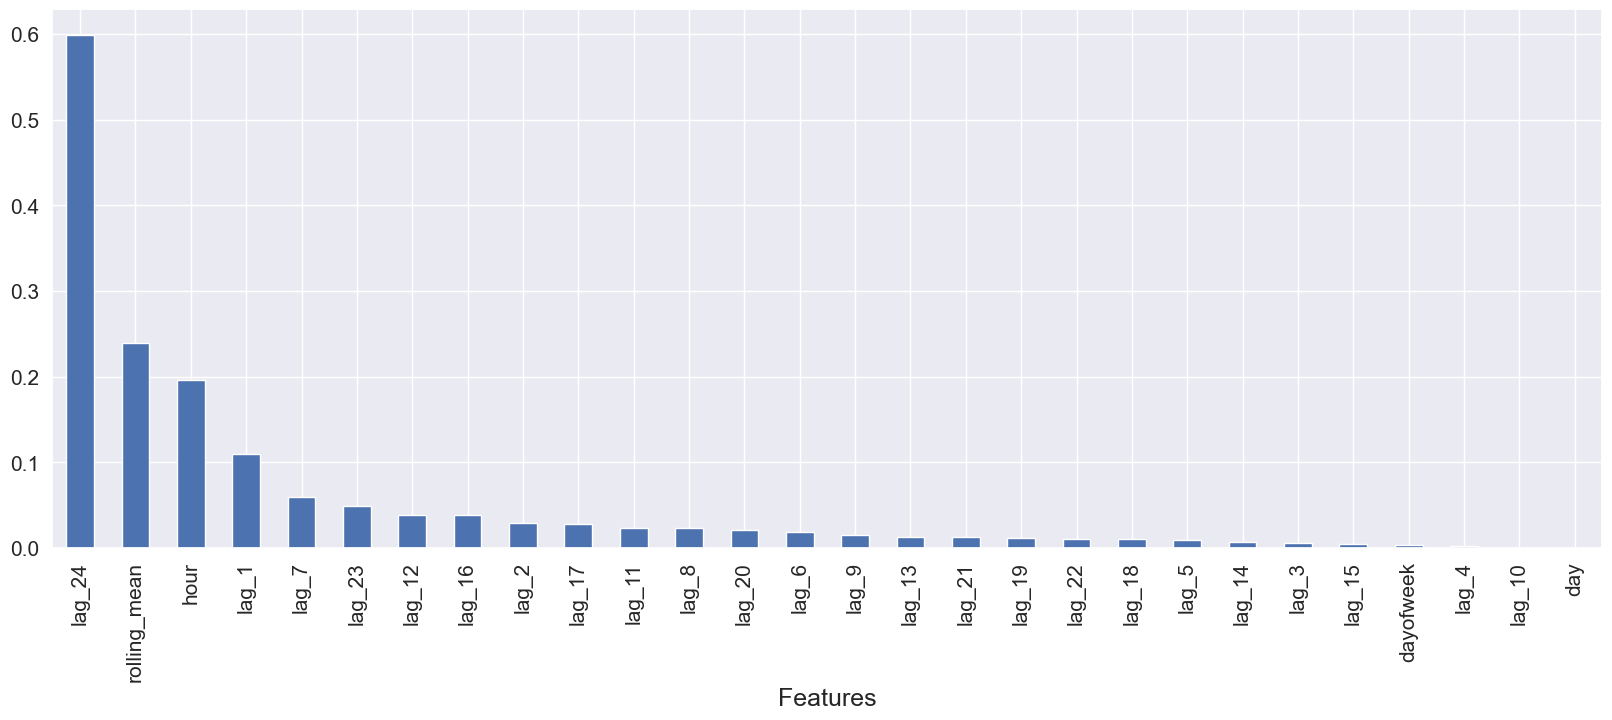

In [45]:
plot_feature_importance(best_dec_tree)

Для модели Решающее дерево самыми важными оказались 24й лаг, скользящее среднее, час заказа такси и 1й лаг (значение прошлого часа). А вот значения дня месяца и дня недели для совершения предсказания не важны.

### Случайный лес с гиперпараметрами.

In [46]:
model_rand_for = RandomForestRegressor(random_state=RANDOM)

# объявляем перебираемые гиперпараметры
params_rand_for = {'n_estimators' : range(10, 201, 20),
                       'max_depth' : range(1, 12, 2),
                       'min_samples_split' : range(2, 5),
                       'min_samples_leaf' : range(2, 5)}

In [47]:
best_rand_for, metrics_rand_for = get_metrics_gridsearch(model_rand_for, params_rand_for, 'RandomForest')
metrics = metrics.append(metrics_rand_for)
metrics

Модель с лучшими гиперпараметрами RandomForestRegressor(max_depth=11, min_samples_leaf=3, n_estimators=190,
                      random_state=12345)
Значение метрики RMSE для лучшей модели 24.49


Модель       RMSE
0  LinearRegression  26.644945
0        ElasticNet  26.619105
0      DecisionTree  28.398872
0      RandomForest  24.488218

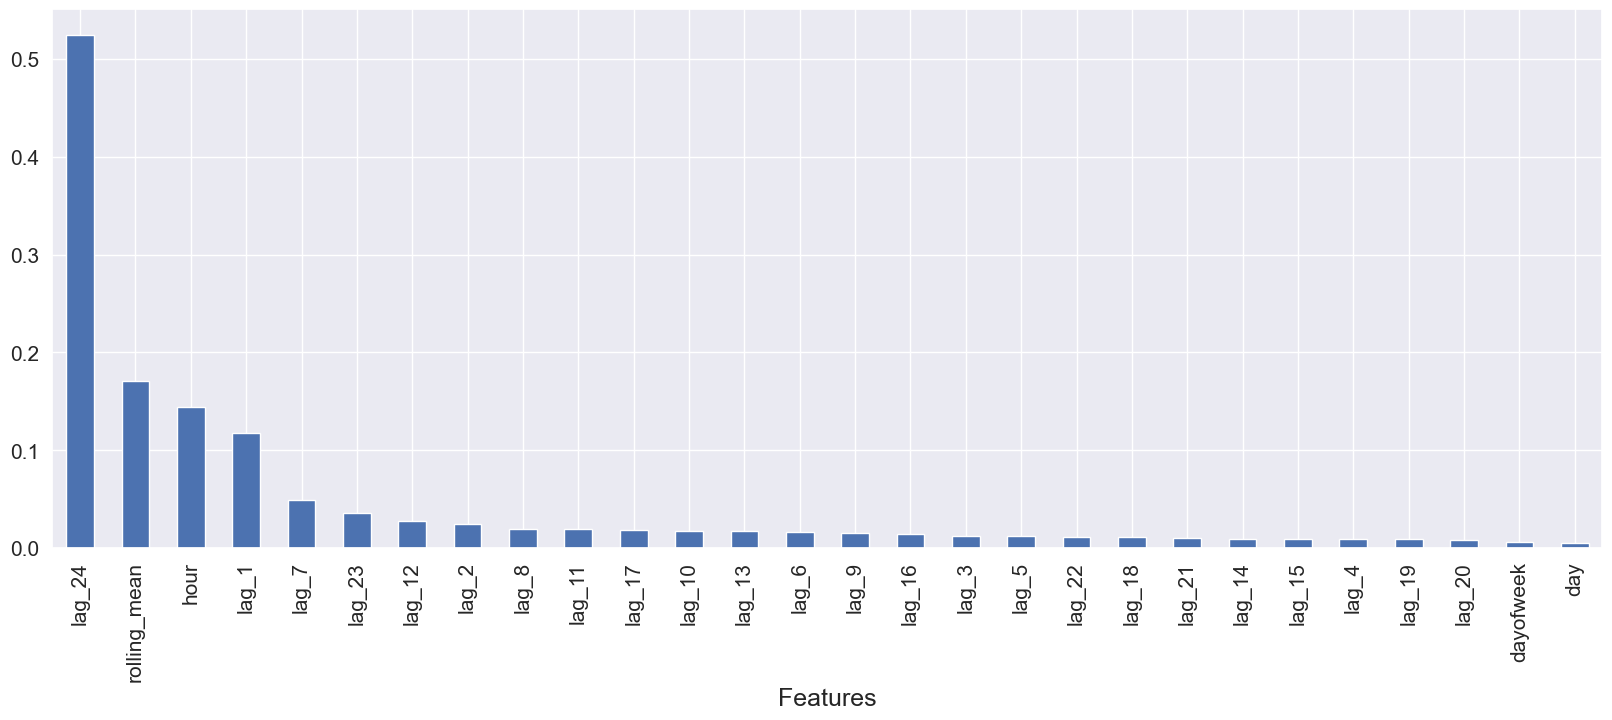

In [48]:
plot_feature_importance(best_rand_for)

Модель Случайный лес при осуществлении предсказаний также делает ставку на 24й лаг, скользящее среднее, час заказа такси и 1й лаг (значение прошлого часа). В конце рейтинга также оказались значения дня месяца и дня недели.

### LGBM без подбора гиперпараметров.

In [49]:
model_lgbm_base = LGBMRegressor(random_state=RANDOM, metric='rmse')

params_lgbm_base = {}

In [50]:
best_lgbm_base, metrics_lgbm_base = get_metrics_gridsearch(model_lgbm_base, params_lgbm_base, 'LGBM_baseline')
metrics = metrics.append(metrics_lgbm_base)
metrics

Модель с лучшими гиперпараметрами LGBMRegressor(metric='rmse', random_state=12345)
Значение метрики RMSE для лучшей модели 24.46


Модель       RMSE
0  LinearRegression  26.644945
0        ElasticNet  26.619105
0      DecisionTree  28.398872
0      RandomForest  24.488218
0     LGBM_baseline  24.461435

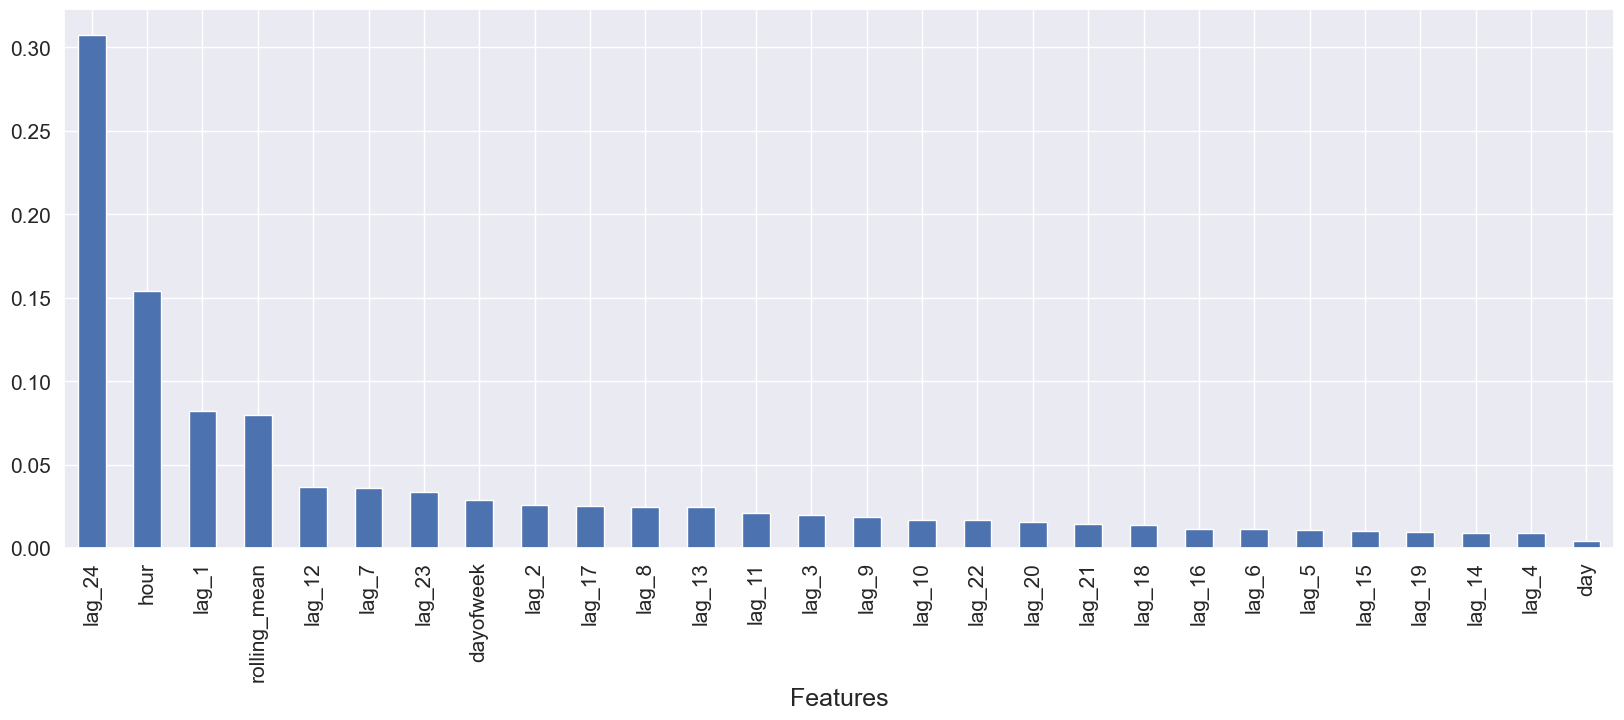

In [51]:
plot_feature_importance(best_lgbm_base)

### LGBM с подбором гиперпараметров.

In [52]:
model_lgbm = LGBMRegressor(random_state=RANDOM, metric='rmse')

params_lgbm = {
    'num_leaves': range(10, 120, 20),
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 150, 200, 300],
    'max_depth': range(1, 101, 10)}

In [53]:
best_lgbm, metrics_lgbm = get_metrics_gridsearch(model_lgbm, params_lgbm, 'LGBM')
metrics = metrics.append(metrics_lgbm)
metrics

Модель с лучшими гиперпараметрами LGBMRegressor(max_depth=11, metric='rmse', num_leaves=10, random_state=12345)
Значение метрики RMSE для лучшей модели 24.18


Модель       RMSE
0  LinearRegression  26.644945
0        ElasticNet  26.619105
0      DecisionTree  28.398872
0      RandomForest  24.488218
0     LGBM_baseline  24.461435
0              LGBM  24.180453

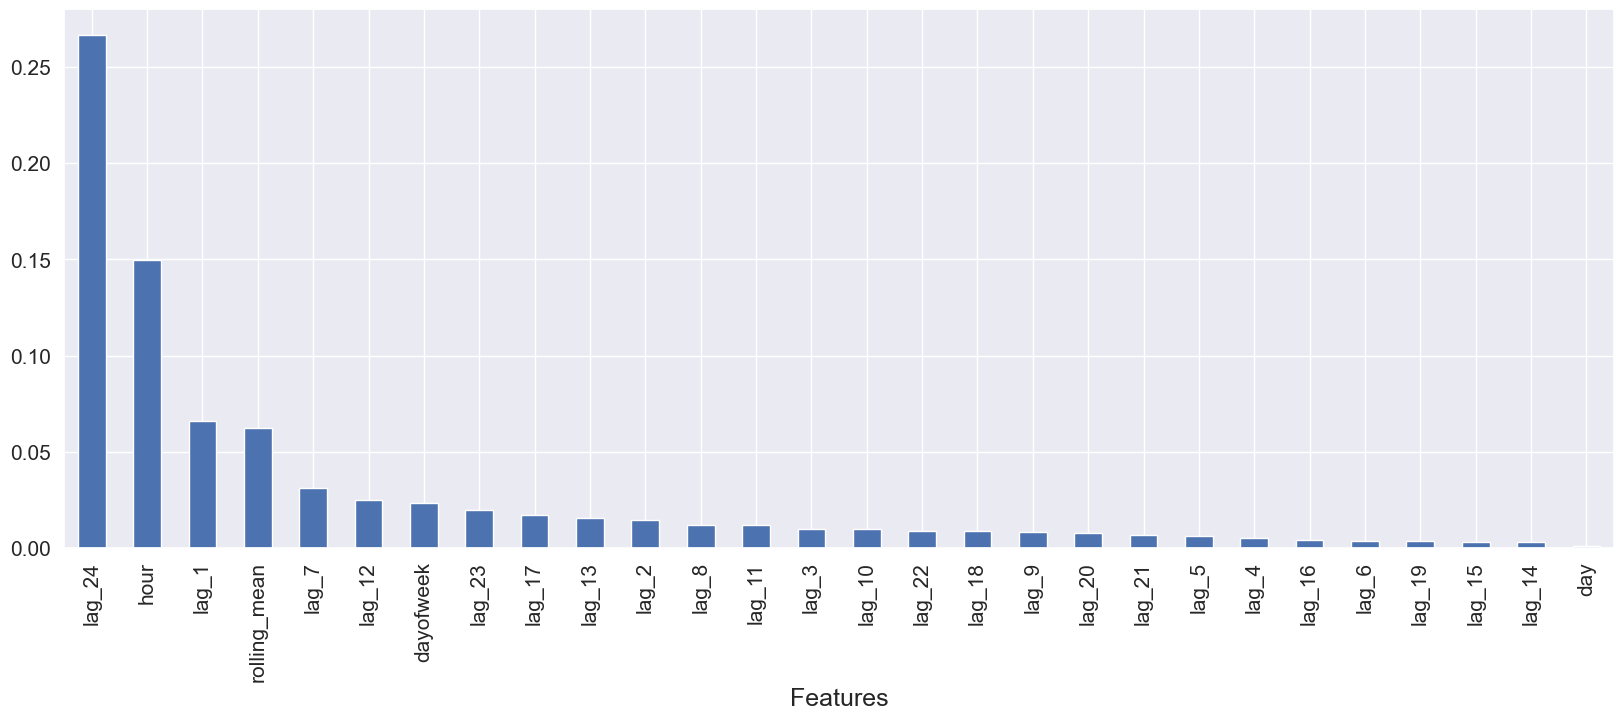

In [54]:
plot_feature_importance(best_lgbm)

LGBM без подбора гиперпараметров и с подбором строит свои предсказания, основываясь на 24м лаге, часе заказа, 1м лаге, скользящем среднем и 7м лаге. Для этой модели значение дня недели более важно, чем для деревянных моделей, однако, день месяца тоже находится на последней строчке важности для предсказаний.

Подбор гиперпараметров помог снизить RMSE почти на три десятых, это хороший показатель, учитывая насколько мало различается RMSE для разных типов моделей (то еть даже линейная регрессия показывает вполне хороший результат).

### CatBoost без подбора гиперпараметров.

In [55]:
model_cat_base = CatBoostRegressor(random_state=RANDOM, 
                                 loss_function='RMSE',
                                 eval_metric='RMSE')

params_cat_base = {}

In [56]:
best_cat_base, metrics_cat_base = get_metrics_gridsearch(model_cat_base, params_cat_base, 'CatBoost_baseline')
metrics = metrics.append(metrics_cat_base)

Learning rate set to 0.050868
0:	learn: 37.7457955	total: 139ms	remaining: 2m 19s
1:	learn: 36.9277145	total: 142ms	remaining: 1m 10s
2:	learn: 36.1475148	total: 144ms	remaining: 47.8s
3:	learn: 35.3724268	total: 146ms	remaining: 36.3s
4:	learn: 34.6088581	total: 148ms	remaining: 29.4s
5:	learn: 33.9266469	total: 150ms	remaining: 24.8s
6:	learn: 33.2176685	total: 152ms	remaining: 21.5s
7:	learn: 32.6736465	total: 154ms	remaining: 19.1s
8:	learn: 32.1000939	total: 155ms	remaining: 17.1s
9:	learn: 31.5472809	total: 157ms	remaining: 15.6s
10:	learn: 31.0217452	total: 159ms	remaining: 14.3s
11:	learn: 30.5716570	total: 161ms	remaining: 13.2s
12:	learn: 30.1185158	total: 162ms	remaining: 12.3s
13:	learn: 29.6767273	total: 164ms	remaining: 11.6s
14:	learn: 29.3104968	total: 166ms	remaining: 10.9s
15:	learn: 28.9440115	total: 168ms	remaining: 10.3s
16:	learn: 28.6065880	total: 169ms	remaining: 9.8s
17:	learn: 28.2624626	total: 171ms	remaining: 9.34s
18:	learn: 27.9702891	total: 173ms	remainin

In [57]:
metrics

Модель       RMSE
0   LinearRegression  26.644945
0         ElasticNet  26.619105
0       DecisionTree  28.398872
0       RandomForest  24.488218
0      LGBM_baseline  24.461435
0               LGBM  24.180453
0  CatBoost_baseline  23.473092

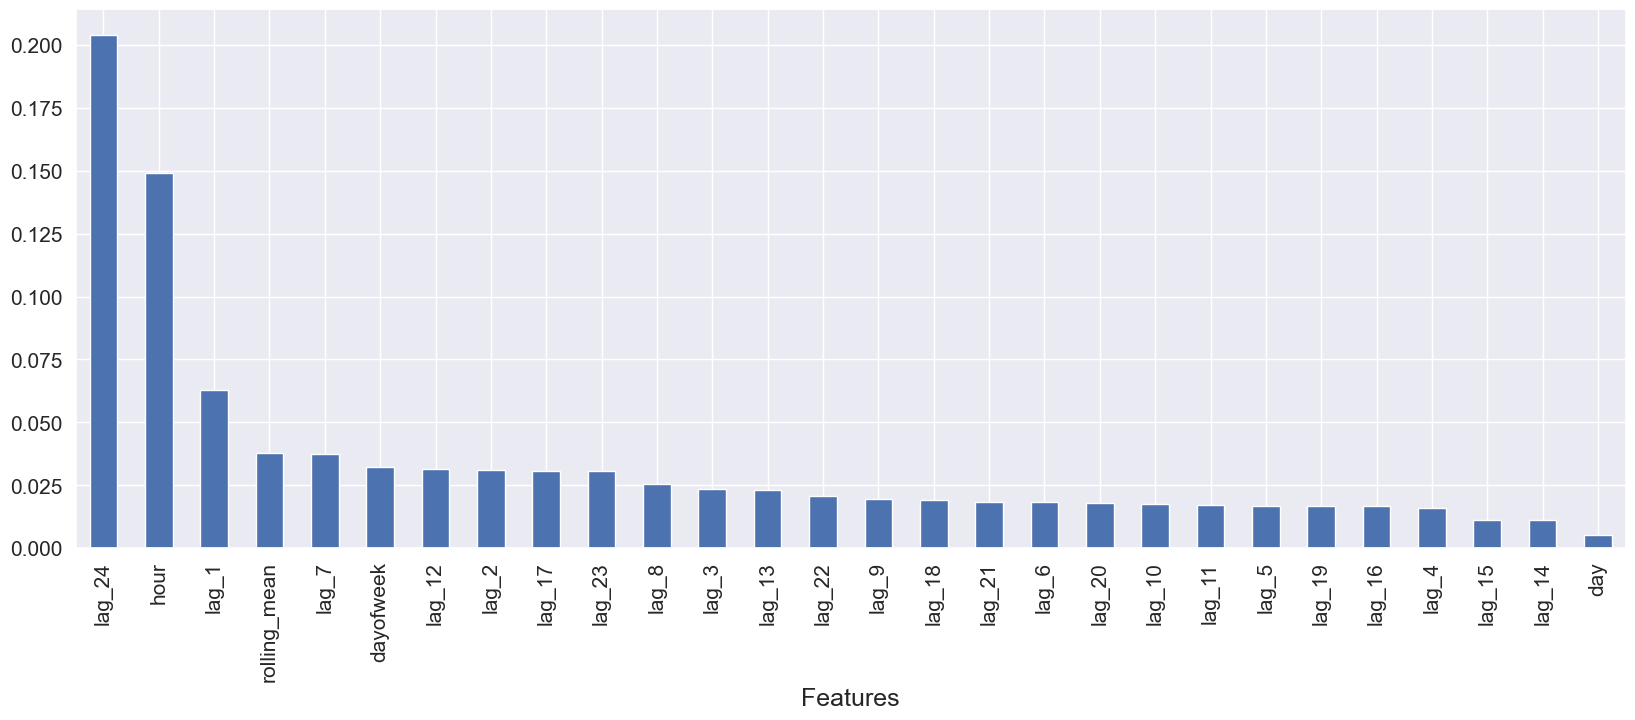

In [58]:
plot_feature_importance(best_cat_base)

### CatBoost с подбором гиперпараметров.

In [59]:
model_cat = CatBoostRegressor(random_state=RANDOM, 
                            loss_function='RMSE',
                            eval_metric='RMSE')

params_cat = {'n_estimators': [100, 150, 200],
        'learning_rate':  [0.1, 0.2, 0.3],
        'max_depth':  [3, 5, 7, 9]}

In [60]:
best_cat, metrics_cat = get_metrics_gridsearch(model_cat, params_cat, 'CatBoost')
metrics = metrics.append(metrics_cat)

0:	learn: 36.9048529	total: 1.8ms	remaining: 358ms
1:	learn: 35.3023523	total: 4.09ms	remaining: 405ms
2:	learn: 34.0224471	total: 5.94ms	remaining: 390ms
3:	learn: 32.7551314	total: 7.37ms	remaining: 361ms
4:	learn: 31.6578256	total: 9.08ms	remaining: 354ms
5:	learn: 30.8163134	total: 10.4ms	remaining: 338ms
6:	learn: 29.9671592	total: 12.1ms	remaining: 334ms
7:	learn: 29.2842944	total: 13.6ms	remaining: 326ms
8:	learn: 28.6469194	total: 15.3ms	remaining: 324ms
9:	learn: 28.0950114	total: 16.7ms	remaining: 318ms
10:	learn: 27.6180483	total: 18.2ms	remaining: 313ms
11:	learn: 27.1933068	total: 19.8ms	remaining: 310ms
12:	learn: 26.8120887	total: 21.3ms	remaining: 306ms
13:	learn: 26.4483745	total: 22.5ms	remaining: 299ms
14:	learn: 26.1096250	total: 23.8ms	remaining: 294ms
15:	learn: 25.8488692	total: 25.1ms	remaining: 288ms
16:	learn: 25.6016249	total: 26.6ms	remaining: 286ms
17:	learn: 25.4171548	total: 28.7ms	remaining: 291ms
18:	learn: 25.1892223	total: 30.3ms	remaining: 289ms
19:	

In [61]:
metrics

Модель       RMSE
0   LinearRegression  26.644945
0         ElasticNet  26.619105
0       DecisionTree  28.398872
0       RandomForest  24.488218
0      LGBM_baseline  24.461435
0               LGBM  24.180453
0  CatBoost_baseline  23.473092
0           CatBoost  23.929455

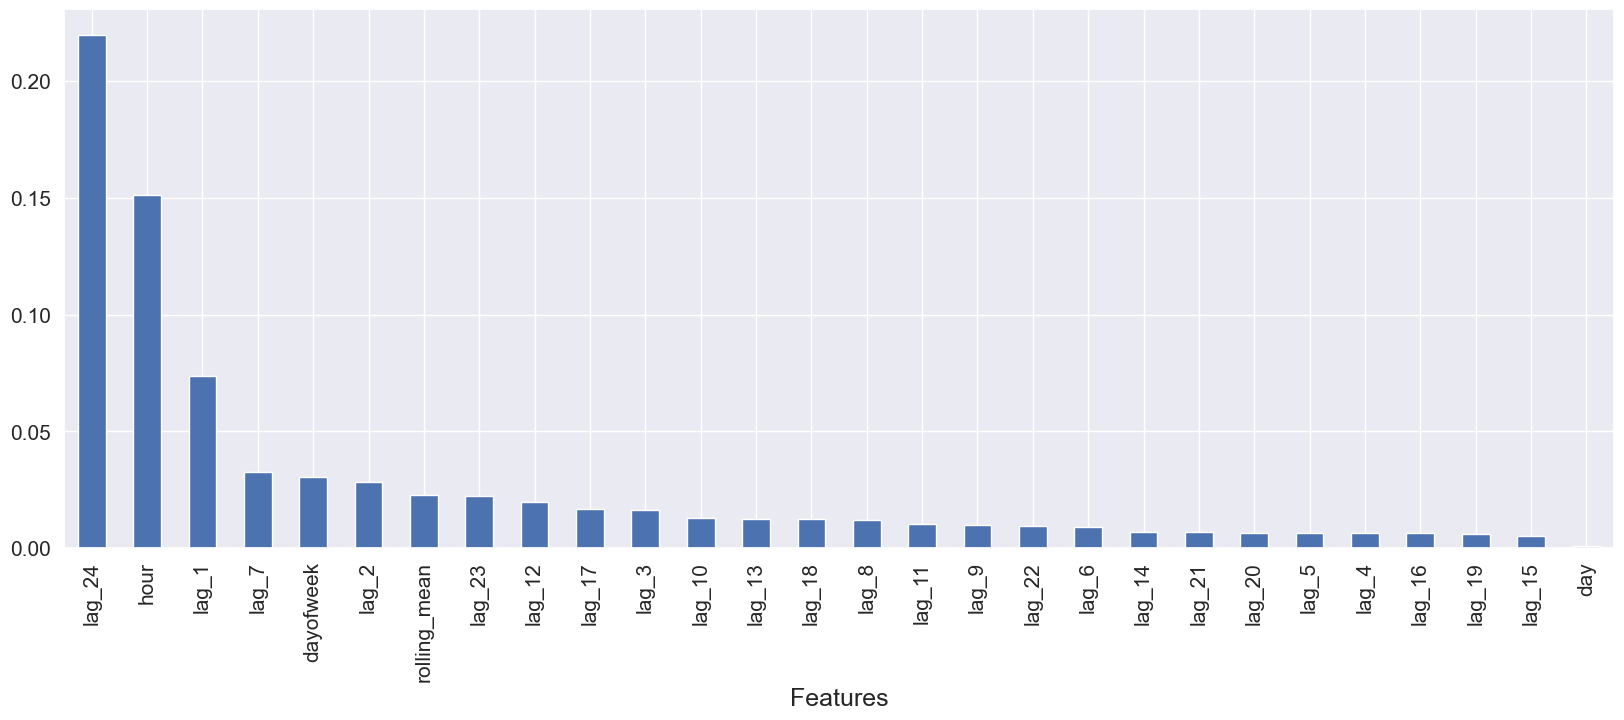

In [62]:
plot_feature_importance(best_cat)

Для моделей типа CatBoost распределение фичей почти полностью повторяет таковое для LGBM, но важность распределяется более равномерно.

CatBoost с подбором гиперпарметров не смог показать лучшей метрики, нежели CatBoost "из коробки" (это редко удается достичь, потому что базовые параметры этой модели изначально удачно сконфигурированы, или же нужно потратить значительно больше времени на подбор, например, с помощью Optuna).

Однако, CatBoost удалось достаточно значительно улучшить метрику RMSE по сравнению с LGBM, по-видимому, как раз за счет увеличения важности побочных лагов и учитываю более широкого спектра фичей с бОльшими весами.

### Оценка моделей.

Визуализируем полученное распределение метрики RMSE по моделям и упорядочим результаты.

In [63]:
metrics.set_index('Модель', inplace=True)
metrics

RMSE
Модель                      
LinearRegression   26.644945
ElasticNet         26.619105
DecisionTree       28.398872
RandomForest       24.488218
LGBM_baseline      24.461435
LGBM               24.180453
CatBoost_baseline  23.473092
CatBoost           23.929455

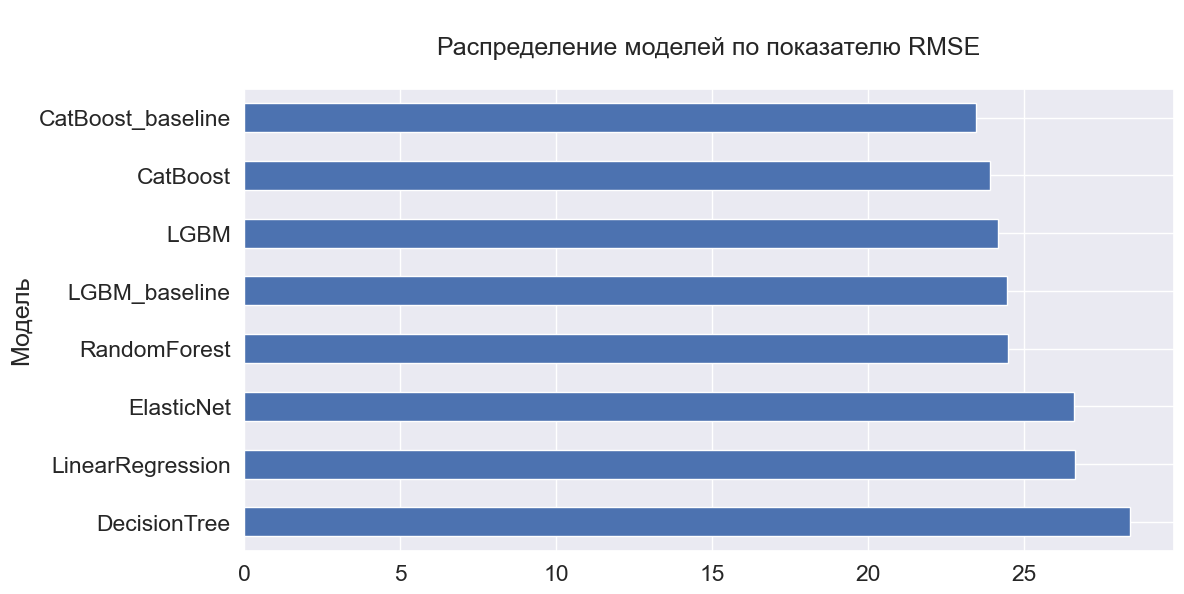

In [64]:
for col in metrics.columns:
    metrics.sort_values(col, ascending=False)[col].plot(kind='barh', title=f'\nРаспределение моделей по показателю {col}\n', figsize=(12, 6))
    plt.show();

По метрике RMSE лучшей моделью из опробованных является CatBoost с базовыми гиперпараметрами, от него несколько отстает CatBoost с подбором гиперпараметров, далее идут вариации LGBM. То есть в целом, бустинги выигрывают у всех остальных моделей. Случайное дерево дает самый худший результат.

Теперь попробуем визуализировать для разных моделей то, насколько хорошо они способны воспроизводить закономерности, сравнив график обучающей выборки и их предсказаний.

Создадим датафрейм, в которым индексами будут даты заказов такси, а колонкой реальные целевые признаки, измененные скользящим средним с окном 24 часа (то есть посуточно, чтобы график был менее шумным). Далее добавим в него предсказания моделей по всем датам и выведем сравнительные графики.

In [65]:
all_predictions_train = pd.DataFrame(index=features_train.index)
all_predictions_train['real_num_orders'] = target_train
all_predictions_train['real_num_orders'] = all_predictions_train['real_num_orders'].rolling(24).mean()

In [66]:
all_predictions_train.tail()

real_num_orders
datetime                            
2018-08-13 09:00:00       135.250000
2018-08-13 10:00:00       137.250000
2018-08-13 11:00:00       139.875000
2018-08-13 12:00:00       138.583333
2018-08-13 13:00:00       138.541667

Введем функцию, которая добавит в датафреейм колонки предсказаний каждой модели, скользящее среднее также возьмем по 24 часам.

In [67]:
def model_predictions(df, model_pred, model_name):
    '''функция добавляет в датафрейм сглаженные скользящим средним предсказания моделей'''
    df[model_name] = model_pred
    df[model_name] = df[model_name].rolling(24).mean()
    
    return df

In [68]:
for i in range(len(model_names)):  
    model_predictions(all_predictions_train, predictions_train[i], model_names[i])

In [69]:
all_predictions_train.tail()

real_num_orders  LinearRegression  ElasticNet  \
datetime                                                             
2018-08-13 09:00:00       135.250000        115.750844  115.711702   
2018-08-13 10:00:00       137.250000        116.926449  116.722073   
2018-08-13 11:00:00       139.875000        117.544003  117.262161   
2018-08-13 12:00:00       138.583333        120.006643  119.715906   
2018-08-13 13:00:00       138.541667        122.368961  122.036207   

                     DecisionTree  RandomForest  LGBM_baseline        LGBM  \
datetime                                                                     
2018-08-13 09:00:00    115.074725    119.209557     124.703275  120.475068   
2018-08-13 10:00:00    115.458898    120.213135     126.638783  121.592199   
2018-08-13 11:00:00    117.403546    121.741315     128.545156  123.176751   
2018-08-13 12:00:00    118.799169    121.859308     128.639298  124.604229   
2018-08-13 13:00:00    119.750637    121.917060     128.810594  125.127229   

                     CatBoost_baseline    CatBoost  
datetime                                            
2018-08-13 09:00:00         131.454671  125.653026  
2018-08-13 10:00:00         133.417230  127.114769  
2018-08-13 11:00:00         135.771471  129.114687  
2018-08-13 12:00:00         135.427374  130.134476  
2018-08-13 13:00:00         135.124952  130.565424

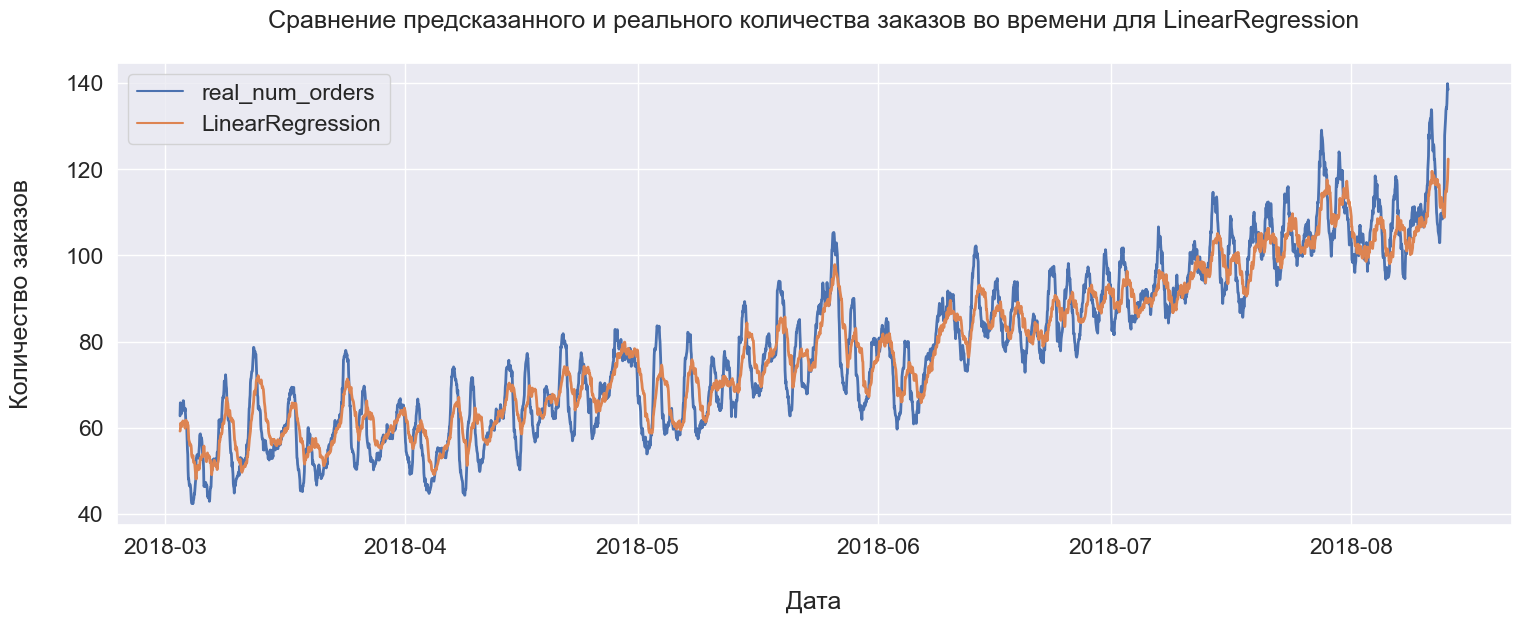

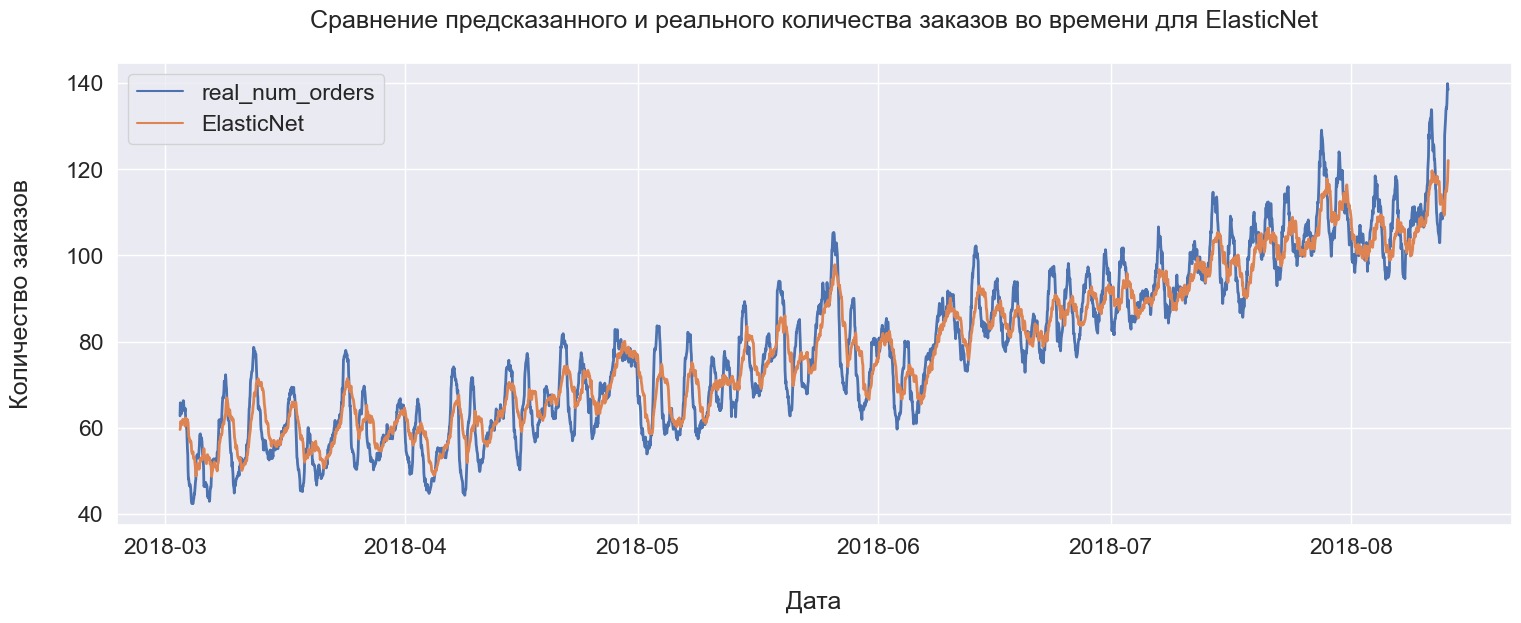

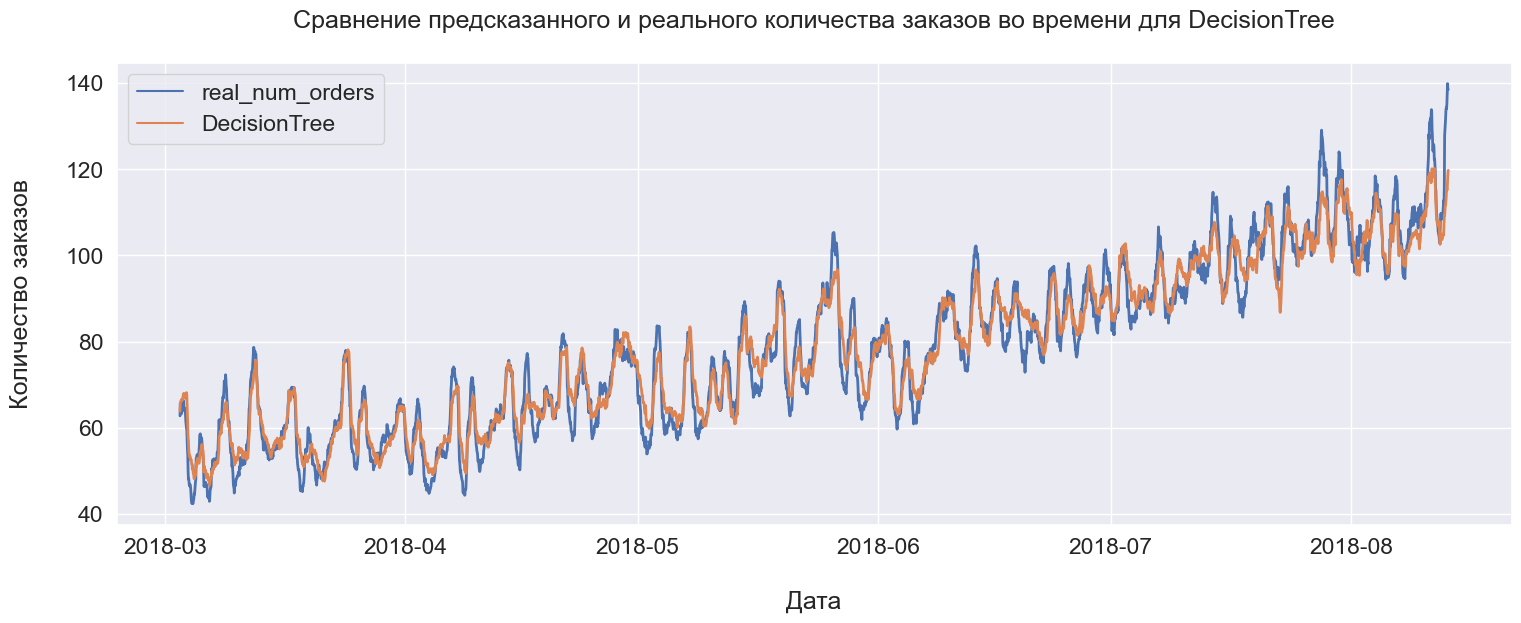

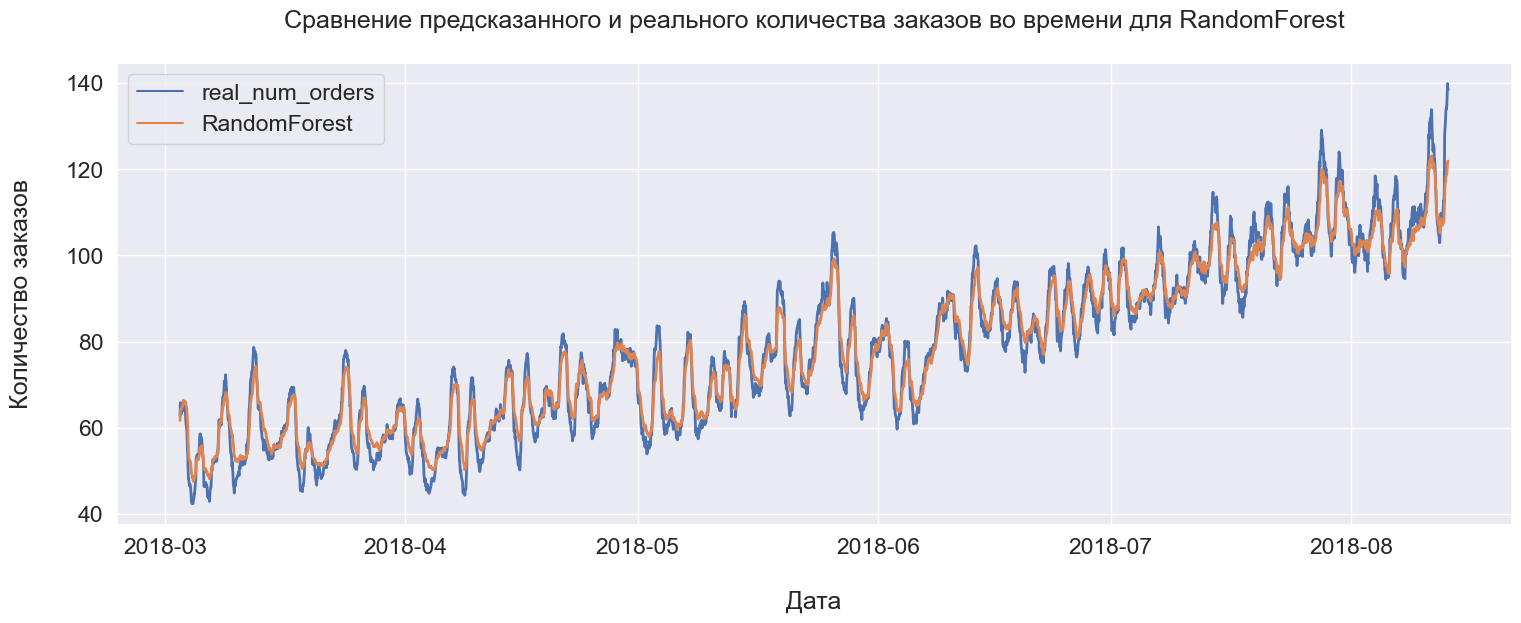

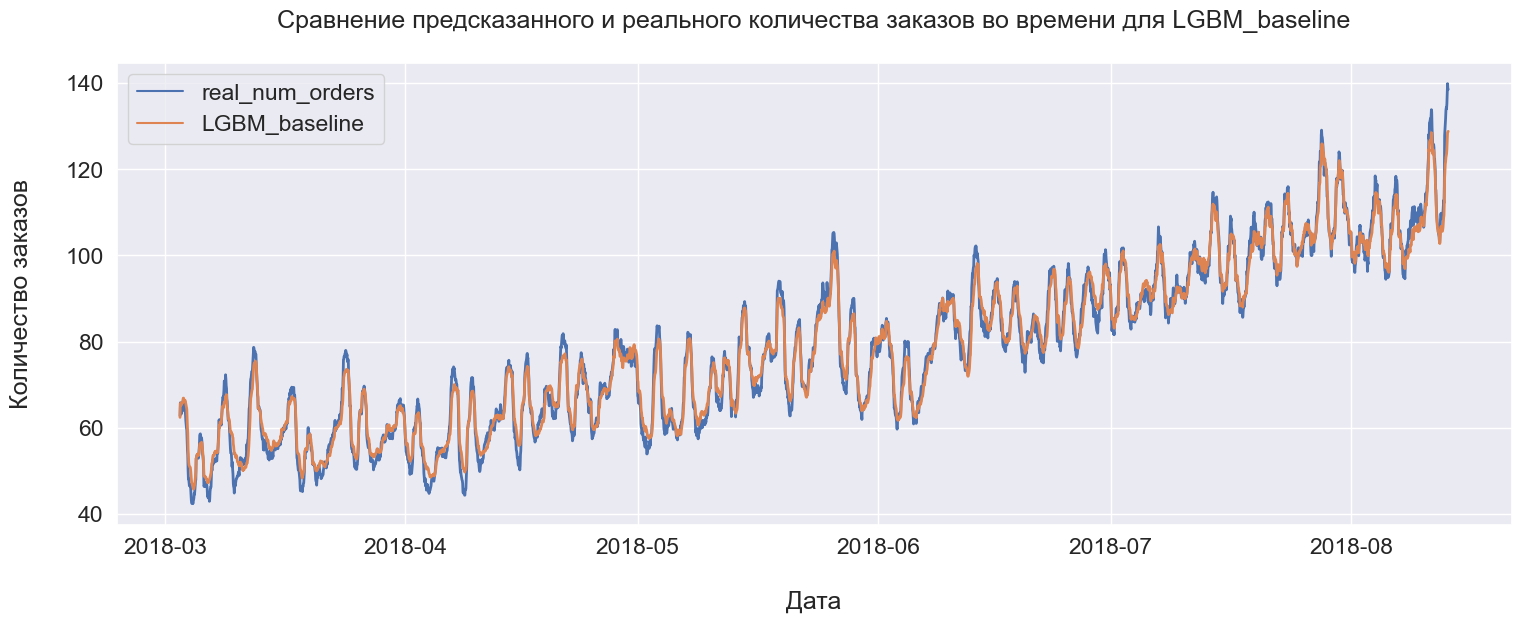

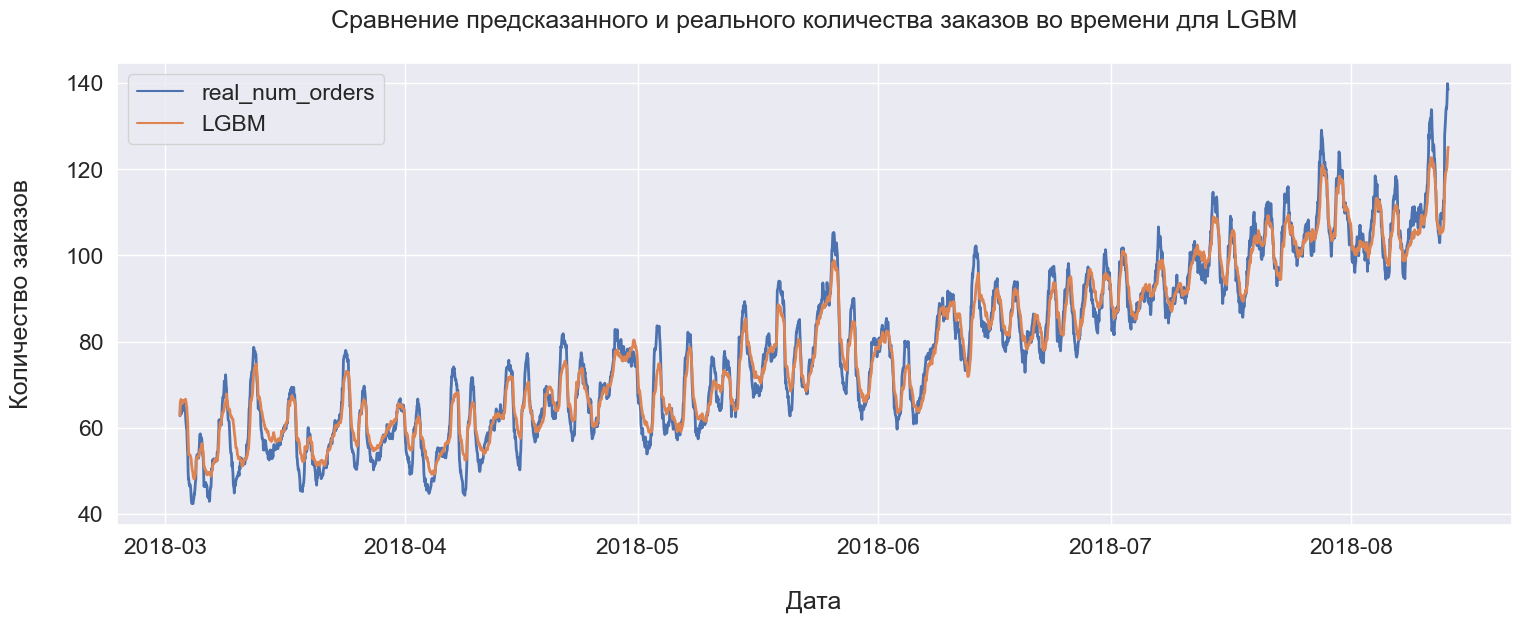

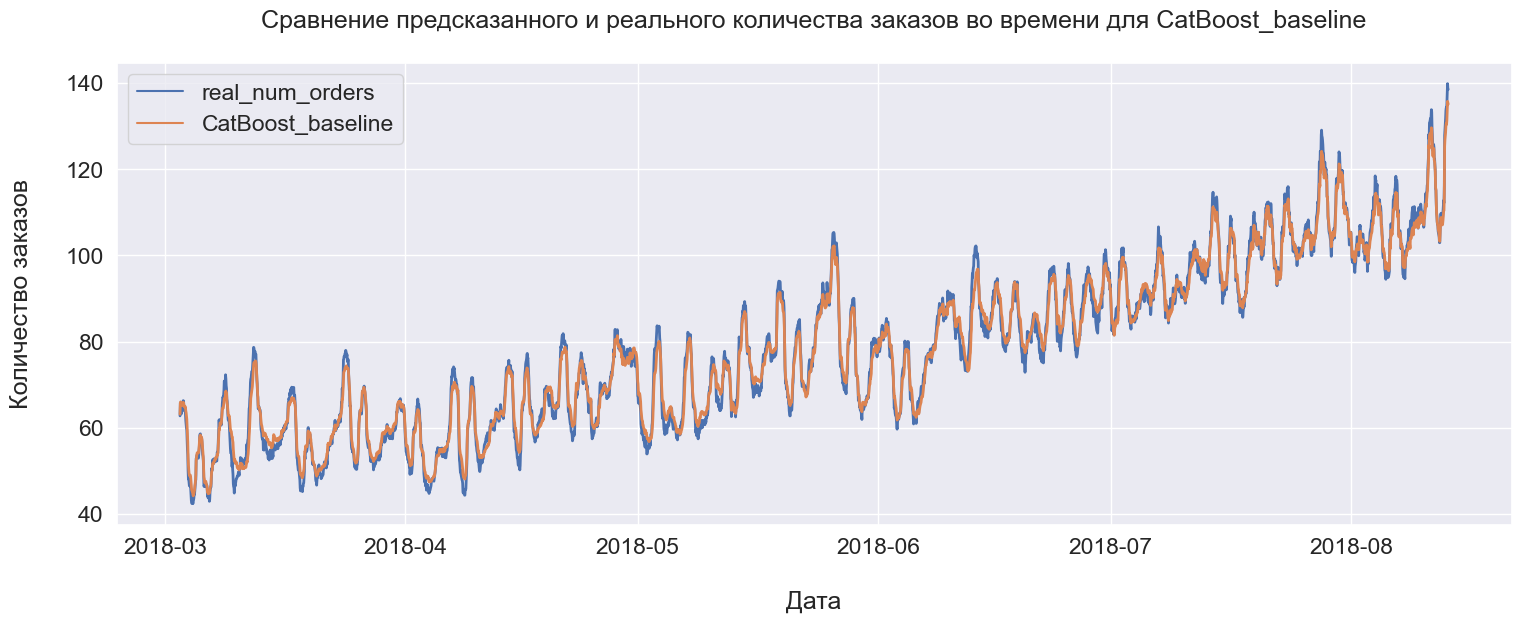

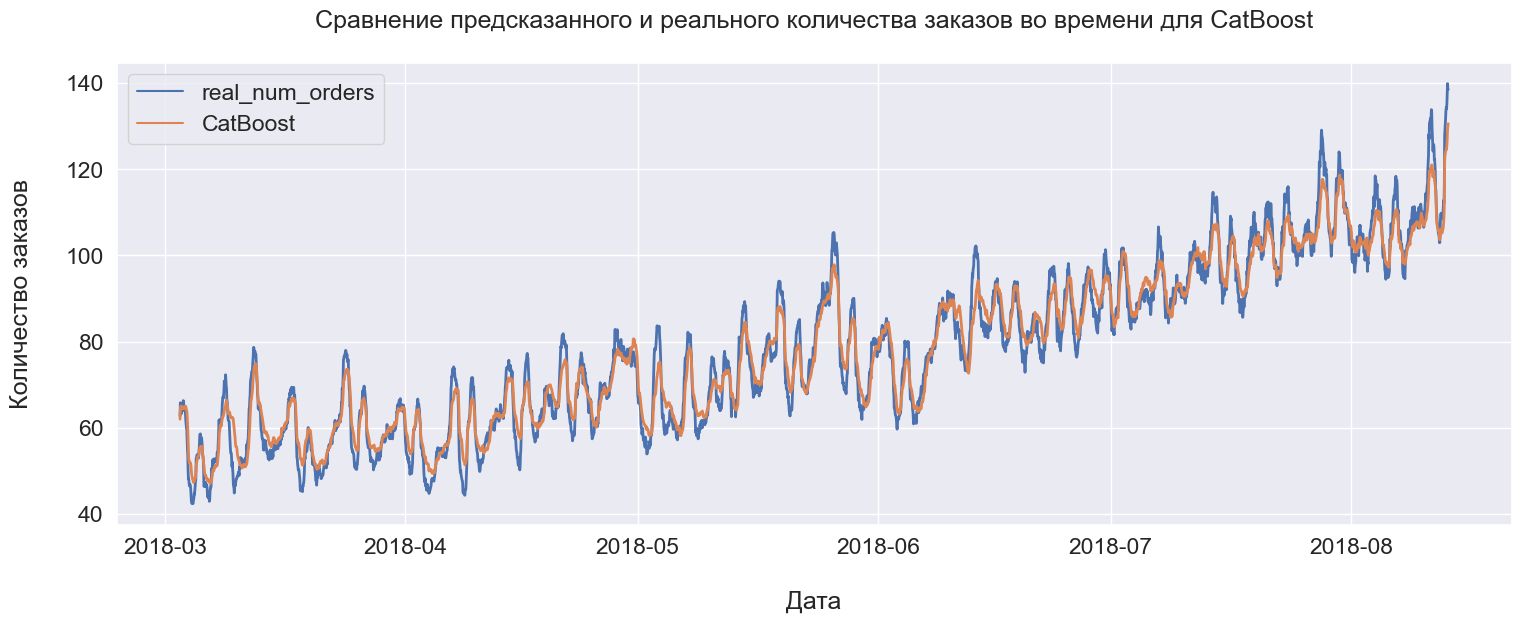

In [70]:
for i in range(len(model_names)):     
    lineplot_timeseries(df=all_predictions_train[['real_num_orders', model_names[i]]], 
            title=f'Сравнение предсказанного и реального количества заказов во времени для {model_names[i]}\n')

Линейные модели и Случайный лес довольно плохо приближают данные, а вот различные ансамбли достаточно успешно справляются с этой задачей. 

Чисто визуально хорошие результаты показывают бейзлайном CatBoost, LGBM и RandomForest, что согласуется с показателями RMSE. В качестве финальнй модели для тестирования по всем параметрам идеально подойдет CatBoost_baseline.

**Выводы по разделу**:
    
Нами были обучены 8 моделей:

- две линейные модели, классическая линейная регрессия и ElasticNet, использующая L1 и L2 регуляризацию, 
- две деревянные модели Решающее дерево и Случайный лес.
- две модели градиентного бустинга CatBoostRegressor и LGBMRegressor, без дополнительных гиперпараметров и с перебором гиперпараметров.

Поиск наилучших гиперпараметров проводился через GridSearchCV с отделением валидационной части через TimeSeriesSplit(). Модели сравнивались по метрике RMSE, результаты формировались в датафрейм для дальнейшего анализа. Результаты были провизуализированы табличным способом, а также с выведением предсказаний временного ряда на тренировочной выборке в сравнении с самой выборкой.

По ключевой метрике `RMSE`, то есть по ошибке предсказаний:

- самые лучшие результаты показывает CatBoost (меньше 24),
- на второй месте LGBM (24.18 - 24.46), сюда относится также RandomForest (24.48) как ансамблевая модель,
- завершают список линейные модели (около 26) и самый плохой результат у DecisionTree 28.39.

Все модели при принятии решений отмечают ценность таких признаков как:

- 24й лаг, 
- скользящее среднее (было выбрано окно 6), 
- час заказа такси, 
- 1й лаг (значение прошлого часа),
- 7й лаг,
- бустинговые модели отмечают важность значения дня недели.

В конце рейтинга важности признаков у всех значение дня месяца.

Таким образом, проанализировав все составляющие, для финального тестирования я рекомендую остановиться на CatBoost_baseline.

## Тестирование

Чтобы наши выводы были полноценны, нужно проверить модели на адекватность, а следовательно, ввести метрику RMSE для Dummy регрессора, который для всех значений предсказывает обычное среднее по выборке.

In [71]:
dummy_model = DummyRegressor(strategy='mean')

dummy_model.fit(features_train, target_train)
dummy_preds = dummy_model.predict(features_test)

dummy_model_rmse = mean_squared_error(target_test, dummy_preds)**0.5
print(f'Метрика RMSE для константной модели на тестовой выборке: {dummy_model_rmse}')

Метрика RMSE для константной модели на тестовой выборке: 84.6499381993622


Все обученные нами модели покали результаты сильно меньше, чем 84.6. Однако, лучшие результаты показал базовый CatBoost, поэтому финальное тестирование с отложенной тестовой выборкой мы проведем на нем.

In [72]:
#задаем лучшую модель
best_model = CatBoostRegressor(random_state=RANDOM, 
                                 loss_function='RMSE',
                                 eval_metric='RMSE')

In [73]:
# обучаем
best_model.fit(features_train,
               target_train,
               verbose=1)

# предсказываем
y_pred = best_model.predict(features_test)
    
# считаем значение метрики
best_model_rmse = mean_squared_error(target_test, y_pred)**0.5

Learning rate set to 0.050868
0:	learn: 37.7457955	total: 2.24ms	remaining: 2.24s
1:	learn: 36.9277145	total: 4.03ms	remaining: 2.01s
2:	learn: 36.1475148	total: 5.79ms	remaining: 1.93s
3:	learn: 35.3724268	total: 7.65ms	remaining: 1.9s
4:	learn: 34.6088581	total: 9.45ms	remaining: 1.88s
5:	learn: 33.9266469	total: 11.2ms	remaining: 1.86s
6:	learn: 33.2176685	total: 13.2ms	remaining: 1.87s
7:	learn: 32.6736465	total: 15.3ms	remaining: 1.9s
8:	learn: 32.1000939	total: 17.1ms	remaining: 1.89s
9:	learn: 31.5472809	total: 19ms	remaining: 1.88s
10:	learn: 31.0217452	total: 20.8ms	remaining: 1.87s
11:	learn: 30.5716570	total: 22.4ms	remaining: 1.85s
12:	learn: 30.1185158	total: 24.4ms	remaining: 1.85s
13:	learn: 29.6767273	total: 26.2ms	remaining: 1.84s
14:	learn: 29.3104968	total: 28ms	remaining: 1.83s
15:	learn: 28.9440115	total: 29.8ms	remaining: 1.83s
16:	learn: 28.6065880	total: 31.5ms	remaining: 1.82s
17:	learn: 28.2624626	total: 33.2ms	remaining: 1.81s
18:	learn: 27.9702891	total: 34.

In [74]:
print(f'Метрика RMSE для лучшей модели на тестовой выборке: {best_model_rmse}')

Метрика RMSE для лучшей модели на тестовой выборке: 40.260354807990815


Полученное значение удовлетворяет критериям заказчика "Значение метрики RMSE на тестовой выборке должно быть не больше 48", поэтому можно считать, что наше исследование прошло успешно и данную модель можно выводить в продакшн.

В завершение, посмотрим насколько хорошо наша модель интерполирует тестовые данные и выведем важность фичей для принимаемых финальной моделью решений.

In [75]:
def lineplot_predictions(target, pred):
    '''функция визуализирует сравнение линейных графиков исходных данных и предсказаний'''

    pred = pd.Series(data=pred, index=target.index)
    
    ax = sns.lineplot(x=target.index, y=target.values, color='red', label='Исходные данные')
    ax = sns.lineplot(x=pred.index, y=pred.values, color='green', label='Предсказания')
    
    ax.set(title='Сравнение предсказанного и реального целевого признака во времени для тестовой выборки\n', 
           xlabel='\nДата', 
           ylabel='Количество заказов\n')

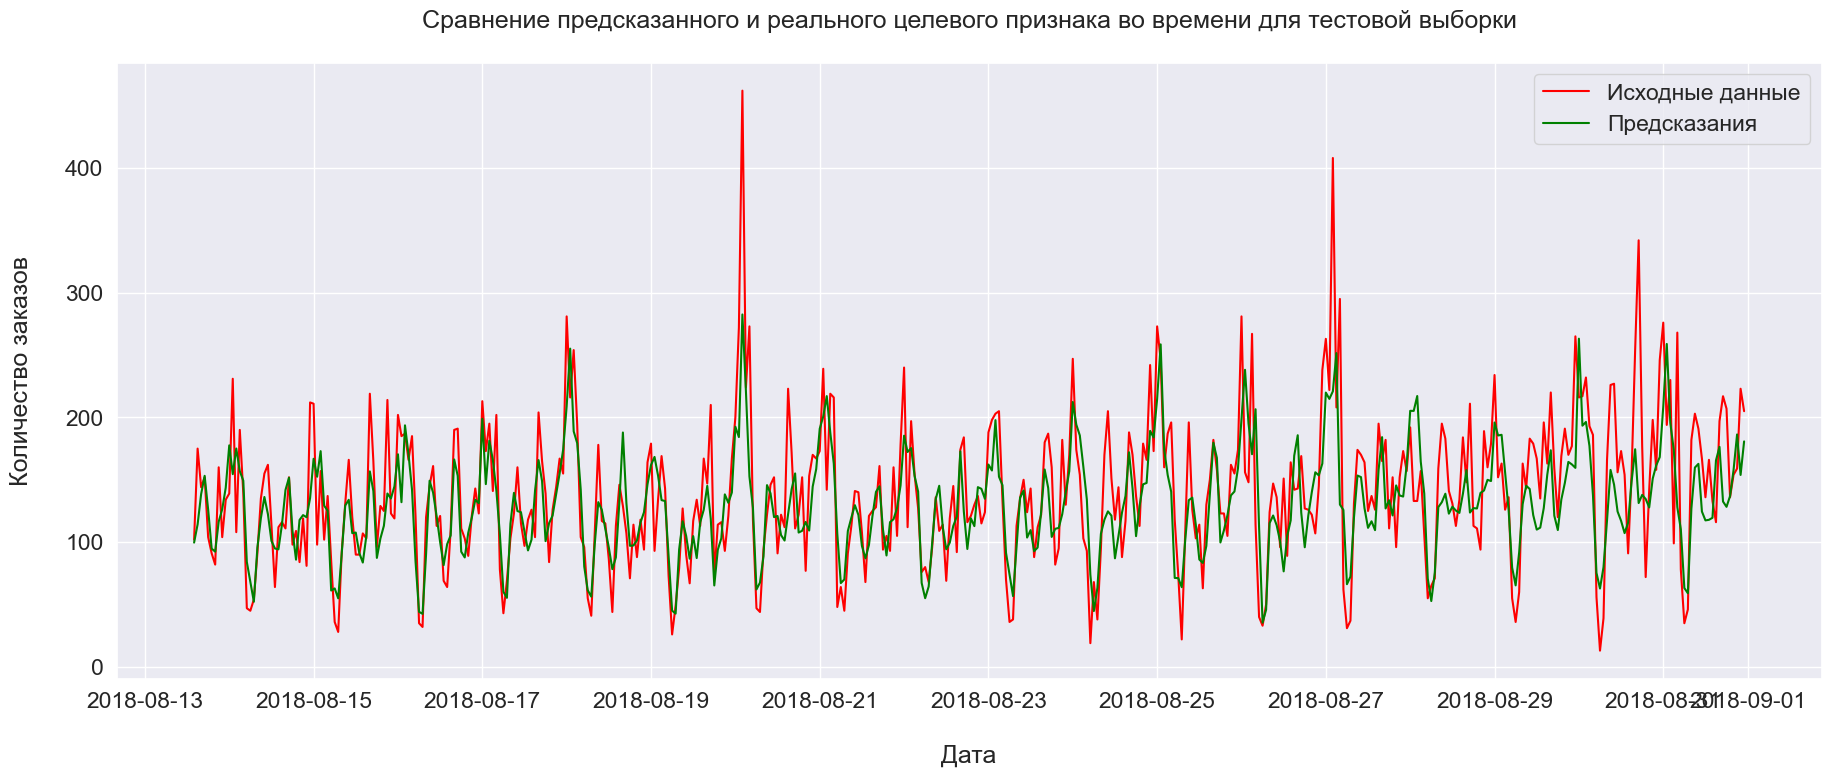

In [76]:
lineplot_predictions(target_test, y_pred)

Самые острые пики сглажены, но общая тенденция повторяется с достаточно хорошим приближением.

In [77]:
def feature_importances(model, columns):
    '''функция выводит важность признаков в построении модели'''
    
    feats={}
    for feature, importance in zip(columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Важность признака'})
    importances = importances.sort_values(by='Важность признака', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index' : 'Признаки'})
    importances = importances[importances['Важность признака'] > 0.001]
    
    sns.set(font_scale=1)
    sns.set(style='whitegrid', color_codes=True, font_scale=1.2)
    fig, ax = plt.subplots()
    fig.figsize=(12, 12)
    sns.barplot(x=importances['Важность признака'], y=importances['Признаки'], data=importances, color='skyblue')
    plt.xlabel('\nВажность признака', fontsize=14, weight='bold')
    plt.ylabel('Признаки\n', fontsize=14, weight='bold')
    plt.title('Важность признаков в модели\n', fontsize=16, weight='bold')
    
    plt.show()
    display(importances)

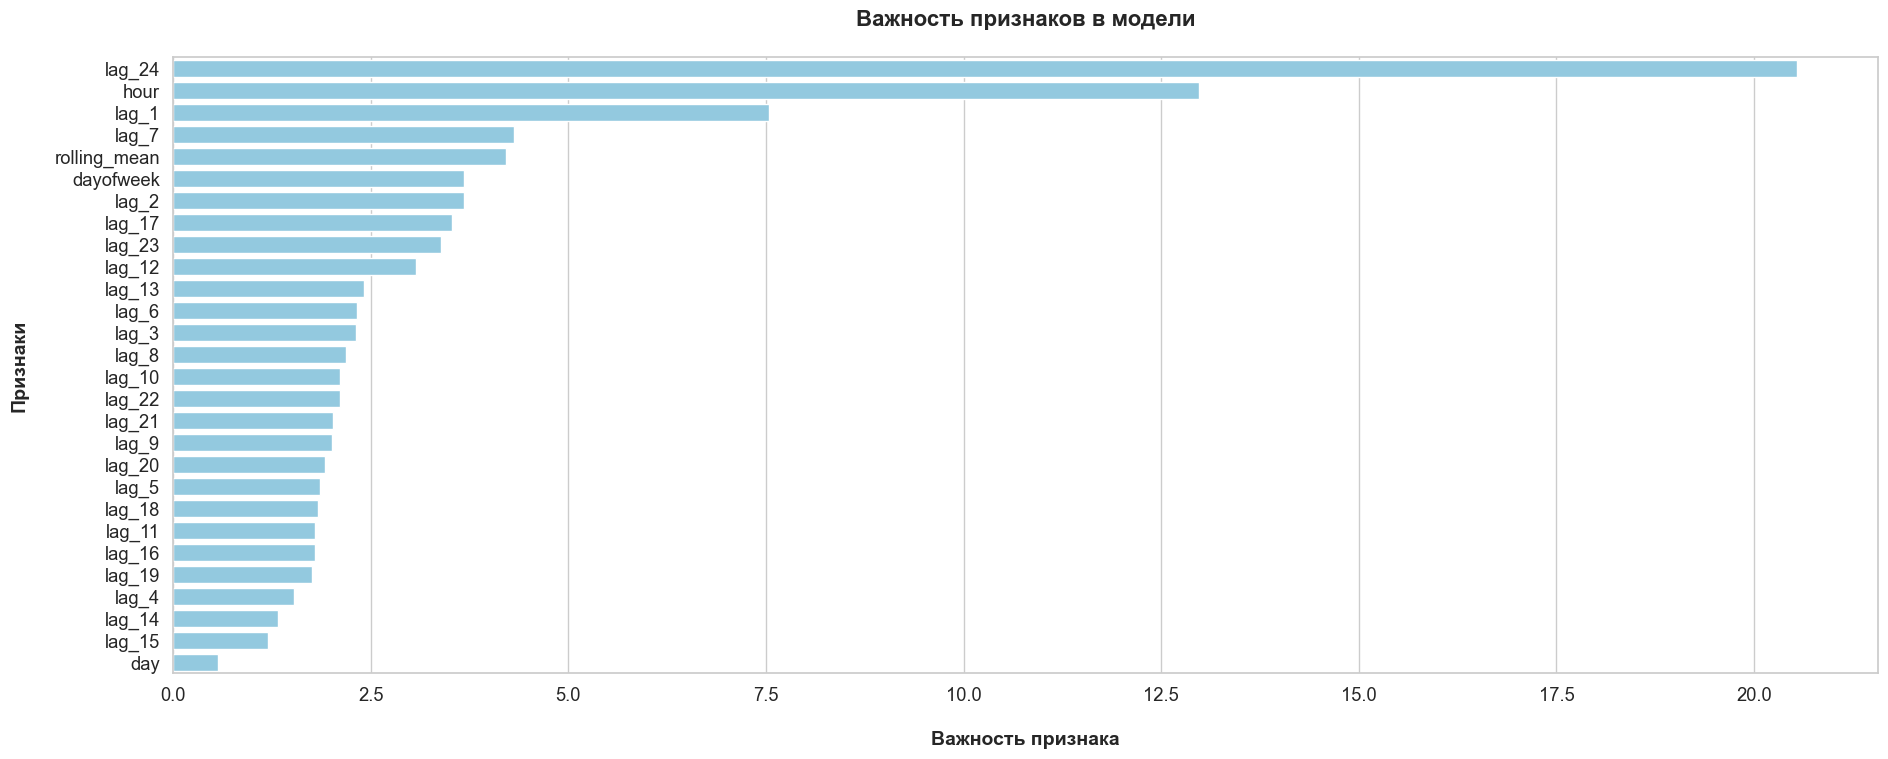

Признаки  Важность признака
0         lag_24          20.543100
1           hour          12.975118
2          lag_1           7.533957
3          lag_7           4.306626
4   rolling_mean           4.214549
5      dayofweek           3.679268
6          lag_2           3.677178
7         lag_17           3.529642
8         lag_23           3.385489
9         lag_12           3.077703
10        lag_13           2.420301
11         lag_6           2.331176
12         lag_3           2.309060
13         lag_8           2.190717
14        lag_10           2.106278
15        lag_22           2.104754
16        lag_21           2.019531
17         lag_9           2.005172
18        lag_20           1.926959
19         lag_5           1.854814
20        lag_18           1.831907
21        lag_11           1.795235
22        lag_16           1.792841
23        lag_19           1.752091
24         lag_4           1.534485
25        lag_14           1.327327
26        lag_15           1.205080
27           day           0.569642

In [78]:
feature_importances(best_model, features_train.columns)

Как и на всех предыдущих графиках, хорошо заметно, что 

- ключевыми признаками для модели являются `lag_24`, `hour` (час совершения заказа), `lag_1`, `lag_7` и `rolling_mean`,
- наименее важным параметров является `day` (порядковый день месяца совершения заказа).

**Выводы**

- При проверке лучшей модели CatBoost_baseline на отложенной тестовой выборке удалось получить итоговое значение метрики RMSE равное 40.26. 
- Это значение значительно ниже baseline 84.65, полученного на DummyRegressor, что означает, что наше исследование прошло успешно и нам удалось достичь его цели - чтобы наша модель эффективно справлялась с прогнозированием количества заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки.

## Выводы по исследованию

Целью нашего исследования являлось построение такой модели машинного обучения, которая помогала бы привлекать больше водителей в период пиковой нагрузки, базируясь на наиболее точном прогнозировании количества заказов такси на следующий час. Качество моделей оценивалось по метрике RMSE (среднеквадратической ошибке предсказаний).

В нашем распоряжении был датасет с историческими данными о заказах такси в аэропортах, который представлял из себя временной ряд на 26496 записей: в качестве индекса было время заказа такси с точностью до 10 минут, целевым признаком было количество заказов такси в этот временной интервал.

В процессе подготовки данных и проведения EDA:

- Были изучены основные характеристики датасета, наличие пропусков и первичный анализ структуры данных, а затем временной ряд был ресемплирован по 1 часу.
- Визуализировано распределение целевого признака (количество заказов), распределение количества заказов по часам и дням недели.
- Для соблюдения всех теоретических предпосылок с помощью обобщенного теста Дикки-Фуллера подтверждена гипотеза о стационарности временного ряда.
- Проведена декомпозиция временного ряда на основные оставляющие и изучены компоненты сезонности, визуализированы графики автокорреляции и частичной автокорреляции.
- На основе полученной информации сгенерированы новые признаки из параметров даты и времени: hour (порядковый номер часа, в который был сделан заказ, от 0 до 23), day (порядковый номер дня, в который был сделан заказ, от 1 до 31), dayofweek (порядковый номер дня недели, в который был сделан заказ, от 0 до 6), лаги со смещениями от 1 до 24, rolling_mean скользящее среднее.
- Визуализирована корреляция между признаками и целевой переменной.

Далее были обучены 8 моделей (там где доступно, производился поиск наилучших гиперпараметров):

- две линейные модели, классическая линейная регрессия и ElasticNet, использующая L1 и L2 регуляризацию,
- две деревянные модели Решающее дерево и Случайный лес,
- две модели градиентного бустинга CatBoostRegressor и LGBMRegressor.

Модели сравнивались по метрике RMSE, для них оценивалась важность признаков для составления предсказаний, результаты формировались в датафрейм. Результаты были провизуализированы табличным способом, а также с выведением предсказаний временного ряда на тренировочной выборке в сравнении с самой выборкой.

Все модели при принятии решений отметили ценность таких признаков как: 24й лаг, скользящее среднее (было выбрано окно 6), час заказа такси, 1й лаг (значение прошлого часа), 7й лаг, бустинговые модели отметили важность значения дня недели.
В конце рейтинга важности признаков у всех моделей значение дня месяца.

С помощью анализа метрики RMSE для финального тестирования была выбрана CatBoost_baseline с гиперпараметрами по умолчанию, она показала результат на обучающей выборке менее 24. Наилучшая модель была протестирована на отложенной ранее тестовой выборке, которую до этого не видела ни одна модель. Таким образом, удалось получить итоговое значение метрики RMSE равное 40.26, что значительно ниже baseline 84.65, полученного на константной модели DummyRegressor.

Ключевыми признаками для модели оказались `lag_24`, `hour` (час совершения заказа), `lag_1`, `lag_7` и `rolling_mean` (скользящее среднее с окном 6 часов).